<a href="https://colab.research.google.com/github/ocy0581/link_Jolssul/blob/master/python/MediaPipeSignToTensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mediapipe

     |████████████████████████████████| 47.4MB 87kB/s 


In [ ]:
import mediapipe as mp
import numpy as np
import time
import cv2

In [ ]:
# Prepare DrawingSpec
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

# Config holistic
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(
    min_detection_confidence=0.5, min_tracking_confidence=0.5)

# 영상 가져오기
cap = cv2.VideoCapture("/content/drive/MyDrive/Video/KETI_SL_0000006020.avi")

# 영상...
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

# cap.set(cv2.CAP_PROP_FPS, 1)

total_frames = cap.get(7)
print(total_frames)

print(cap.get(cv2.CAP_PROP_FPS))

frame_rate = 10
prev = 0
i = 0
left_hand_lists = []
right_hand_lists = []
face_lists = []
pose_lists = []

def LandmarkToList(SourceLandmark, parts):
  DstList = []
  if (SourceLandmark):
    for coord in SourceLandmark.landmark:
      DstList.append([coord.x, coord.y, coord.z])
    return DstList
  else:
    if (parts == "hands"):
      for i in range(21):
        DstList.append([0,0,0])
    if (parts == "face"):
      for i in range(468):
        DstList.append([0,0,0])
    if (parts == "pose"):
      for i in range(33):
        DstList.append([0,0,0])
    return DstList

while cap.isOpened():
#     time_elapsed = time.time() - prev
    success, image = cap.read()

#     if time_elapsed > 1./frame_rate:
#         prev = time.time()
        
    if not success:
        print("Ignoring empty camera frame.")
        # If loading a video, use 'break' instead of 'continue'.
        break

    # Flip the image horizontally for a later selfie-view display, and convert
    # the BGR image to RGB.
    image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    results = holistic.process(image)

    # Draw landmark annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
      image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)
    mp_drawing.draw_landmarks(
      image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(
      image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(
      image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    
    left_hand_lists.append(LandmarkToList(results.left_hand_landmarks,"hands"))
    right_hand_lists.append(LandmarkToList(results.right_hand_landmarks,"hands"))
    face_lists.append(LandmarkToList(results.face_landmarks,"face"))
    pose_lists.append(LandmarkToList(results.pose_landmarks,"pose"))
        
#     cv2.imshow('MediaPipe Holistic', image)
#     if cv2.waitKey(5) & 0xFF == ord('q'):
#         break
holistic.close()
cap.release()
cv2.destroyAllWindows()

156.0
29.970029
Ignoring empty camera frame.


In [ ]:
import torch

In [ ]:
LeftHandTensor = torch.FloatTensor(left_hand_lists)
RightHandTensor = torch.FloatTensor(right_hand_lists)
FaceTensor = torch.FloatTensor(face_lists)
poseTensor = torch.FloatTensor(pose_lists)

print(LeftHandTensor.shape, RightHandTensor.shape, FaceTensor.shape, poseTensor.shape)

torch.Size([156, 21, 3]) torch.Size([156, 21, 3]) torch.Size([156, 468, 3]) torch.Size([156, 33, 3])


In [ ]:
results.face_landmarks.DESCRIPTOR.fields_by_name.values()

In [ ]:
holistic.process

<bound method Holistic.process of <mediapipe.python.solutions.holistic.Holistic object at 0x7f0348ebec90>>

In [ ]:
mp_holistic.HAND_CONNECTIONS

frozenset({(<HandLandmark.WRIST: 0>, <HandLandmark.THUMB_CMC: 1>),
           (<HandLandmark.WRIST: 0>, <HandLandmark.INDEX_FINGER_MCP: 5>),
           (<HandLandmark.WRIST: 0>, <HandLandmark.PINKY_MCP: 17>),
           (<HandLandmark.THUMB_CMC: 1>, <HandLandmark.THUMB_MCP: 2>),
           (<HandLandmark.THUMB_MCP: 2>, <HandLandmark.THUMB_IP: 3>),
           (<HandLandmark.THUMB_IP: 3>, <HandLandmark.THUMB_TIP: 4>),
           (<HandLandmark.INDEX_FINGER_MCP: 5>,
            <HandLandmark.INDEX_FINGER_PIP: 6>),
           (<HandLandmark.INDEX_FINGER_MCP: 5>,
            <HandLandmark.MIDDLE_FINGER_MCP: 9>),
           (<HandLandmark.INDEX_FINGER_PIP: 6>,
            <HandLandmark.INDEX_FINGER_DIP: 7>),
           (<HandLandmark.INDEX_FINGER_DIP: 7>,
            <HandLandmark.INDEX_FINGER_TIP: 8>),
           (<HandLandmark.MIDDLE_FINGER_MCP: 9>,
            <HandLandmark.MIDDLE_FINGER_PIP: 10>),
           (<HandLandmark.MIDDLE_FINGER_MCP: 9>,
            <HandLandmark.RING_FINGER_MCP:

In [ ]:
edge_index1 = [list(x) for x in mp_holistic.HAND_CONNECTIONS]

In [ ]:
edge_index1

[[<HandLandmark.INDEX_FINGER_MCP: 5>, <HandLandmark.MIDDLE_FINGER_MCP: 9>],
 [<HandLandmark.MIDDLE_FINGER_PIP: 10>, <HandLandmark.MIDDLE_FINGER_DIP: 11>],
 [<HandLandmark.INDEX_FINGER_MCP: 5>, <HandLandmark.INDEX_FINGER_PIP: 6>],
 [<HandLandmark.RING_FINGER_DIP: 15>, <HandLandmark.RING_FINGER_TIP: 16>],
 [<HandLandmark.RING_FINGER_MCP: 13>, <HandLandmark.PINKY_MCP: 17>],
 [<HandLandmark.PINKY_PIP: 18>, <HandLandmark.PINKY_DIP: 19>],
 [<HandLandmark.THUMB_CMC: 1>, <HandLandmark.THUMB_MCP: 2>],
 [<HandLandmark.INDEX_FINGER_PIP: 6>, <HandLandmark.INDEX_FINGER_DIP: 7>],
 [<HandLandmark.WRIST: 0>, <HandLandmark.PINKY_MCP: 17>],
 [<HandLandmark.THUMB_IP: 3>, <HandLandmark.THUMB_TIP: 4>],
 [<HandLandmark.MIDDLE_FINGER_MCP: 9>, <HandLandmark.MIDDLE_FINGER_PIP: 10>],
 [<HandLandmark.WRIST: 0>, <HandLandmark.INDEX_FINGER_MCP: 5>],
 [<HandLandmark.THUMB_MCP: 2>, <HandLandmark.THUMB_IP: 3>],
 [<HandLandmark.RING_FINGER_PIP: 14>, <HandLandmark.RING_FINGER_DIP: 15>],
 [<HandLandmark.MIDDLE_FINGER_DI

In [ ]:
edge_index1[0][1].value

9

In [ ]:
def enumToInt(num):
  return num.value

In [ ]:
enumToInt(edge_index1[0][0])

5

In [ ]:
for i, content in enumerate(edge_index1):
  for x in range(2):
    edge_index1[i][x] = edge_index1[i][x].value

In [ ]:
edge_index1

[[5, 9],
 [10, 11],
 [5, 6],
 [15, 16],
 [13, 17],
 [18, 19],
 [1, 2],
 [6, 7],
 [0, 17],
 [3, 4],
 [9, 10],
 [0, 5],
 [2, 3],
 [14, 15],
 [11, 12],
 [19, 20],
 [0, 1],
 [9, 13],
 [17, 18],
 [13, 14],
 [7, 8]]

In [ ]:
print(sorted(edge_index1))

[[0, 1], [0, 5], [0, 17], [1, 2], [2, 3], [3, 4], [5, 6], [5, 9], [6, 7], [7, 8], [9, 10], [9, 13], [10, 11], [11, 12], [13, 14], [13, 17], [14, 15], [15, 16], [17, 18], [18, 19], [19, 20]]


In [ ]:
edge_index1 = sorted(edge_index1)

In [ ]:
reverse_edge_index1 = [list(reversed(x)) for x in edge_index1]

In [ ]:
reverse_edge_index1

[[1, 0],
 [5, 0],
 [17, 0],
 [2, 1],
 [3, 2],
 [4, 3],
 [6, 5],
 [9, 5],
 [7, 6],
 [8, 7],
 [10, 9],
 [13, 9],
 [11, 10],
 [12, 11],
 [14, 13],
 [17, 13],
 [15, 14],
 [16, 15],
 [18, 17],
 [19, 18],
 [20, 19]]

In [ ]:
edge_index1

[[0, 1],
 [0, 5],
 [0, 17],
 [1, 2],
 [2, 3],
 [3, 4],
 [5, 6],
 [5, 9],
 [6, 7],
 [7, 8],
 [9, 10],
 [9, 13],
 [10, 11],
 [11, 12],
 [13, 14],
 [13, 17],
 [14, 15],
 [15, 16],
 [17, 18],
 [18, 19],
 [19, 20]]

In [ ]:
left_hand_edge_index = edge_index1 + reverse_edge_index1

In [ ]:
left_hand_edge_index = sorted(left_hand_edge_index)

In [ ]:
left_hand_edge_index

[[0, 1],
 [0, 5],
 [0, 17],
 [1, 0],
 [1, 2],
 [2, 1],
 [2, 3],
 [3, 2],
 [3, 4],
 [4, 3],
 [5, 0],
 [5, 6],
 [5, 9],
 [6, 5],
 [6, 7],
 [7, 6],
 [7, 8],
 [8, 7],
 [9, 5],
 [9, 10],
 [9, 13],
 [10, 9],
 [10, 11],
 [11, 10],
 [11, 12],
 [12, 11],
 [13, 9],
 [13, 14],
 [13, 17],
 [14, 13],
 [14, 15],
 [15, 14],
 [15, 16],
 [16, 15],
 [17, 0],
 [17, 13],
 [17, 18],
 [18, 17],
 [18, 19],
 [19, 18],
 [19, 20],
 [20, 19]]

In [ ]:
LeftHandTensor.shape[1:]

torch.Size([21, 3])

In [ ]:
#!pip install torch-geometric

In [ ]:
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-geometric

     |████████████████████████████████| 2.6MB 3.6MB/s 
     |████████████████████████████████| 1.5MB 3.8MB/s 
     |████████████████████████████████| 194kB 4.1MB/s 
     |████████████████████████████████| 235kB 44.7MB/s 
     |████████████████████████████████| 2.2MB 52.3MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 


In [ ]:
from torch_geometric.data import Data

In [ ]:
LeftHandTensor[100]

tensor([[ 6.5418e-01,  4.7617e-01, -2.1326e-05],
        [ 6.6103e-01,  4.4198e-01, -1.1508e-02],
        [ 6.5704e-01,  4.0024e-01, -2.3712e-02],
        [ 6.6174e-01,  3.6874e-01, -3.1593e-02],
        [ 6.7561e-01,  3.5283e-01, -4.4359e-02],
        [ 6.2584e-01,  4.0534e-01, -5.1377e-02],
        [ 5.9545e-01,  3.7983e-01, -5.1240e-02],
        [ 5.9747e-01,  3.8096e-01, -3.4821e-02],
        [ 6.0382e-01,  3.8982e-01, -2.3746e-02],
        [ 6.1334e-01,  4.2492e-01, -4.5360e-02],
        [ 5.8550e-01,  3.9212e-01, -6.0290e-02],
        [ 5.6763e-01,  3.7130e-01, -6.0513e-02],
        [ 5.5390e-01,  3.5887e-01, -6.0992e-02],
        [ 6.0521e-01,  4.4524e-01, -3.6279e-02],
        [ 5.7492e-01,  4.2551e-01, -5.2253e-02],
        [ 5.5447e-01,  4.1297e-01, -5.6850e-02],
        [ 5.3835e-01,  4.0569e-01, -5.9390e-02],
        [ 6.0145e-01,  4.6411e-01, -2.5301e-02],
        [ 5.7498e-01,  4.5377e-01, -4.0317e-02],
        [ 5.5922e-01,  4.5184e-01, -4.7446e-02],
        [ 5.4527e-01

In [ ]:
LeftHandEdgeTensor = torch.LongTensor(left_hand_edge_index)

In [ ]:
LeftHandEdgeTensor.dtype

torch.int64

In [ ]:
LeftHandData = Data(x=LeftHandTensor[100],edge_index=LeftHandEdgeTensor)

In [ ]:
LeftHandData

Data(edge_index=[42, 2], x=[21, 3])

In [ ]:
TransposedLeftHandEdge = torch.transpose(LeftHandEdgeTensor,0,1)

In [ ]:
TransposedLeftHandEdge.shape

torch.Size([2, 42])

In [ ]:
LeftHandData = Data(x=LeftHandTensor[100],edge_index=TransposedLeftHandEdge)

In [ ]:
from torch_geometric.utils import to_networkx

In [ ]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

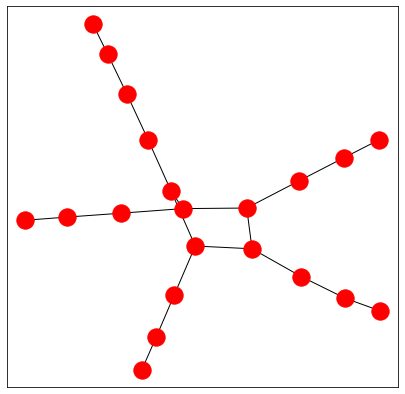

In [ ]:
G = to_networkx(LeftHandData, to_undirected=True)

def visualize(h, color="red", epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

visualize(G)

Frame 0


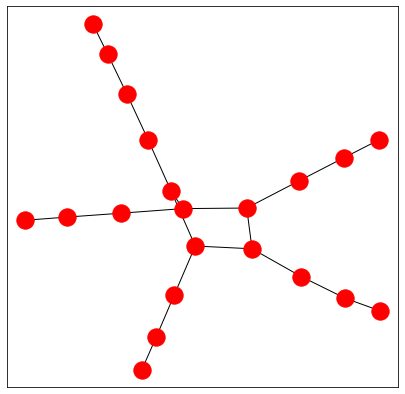

Frame 1


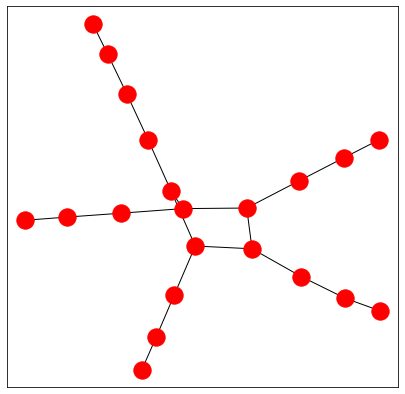

Frame 2


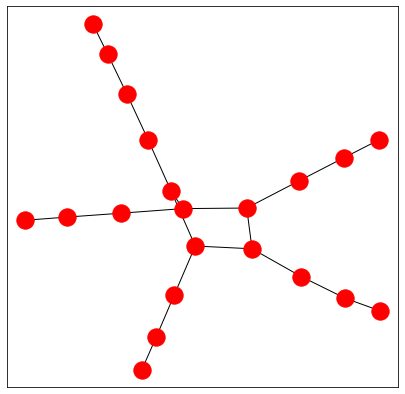

Frame 3


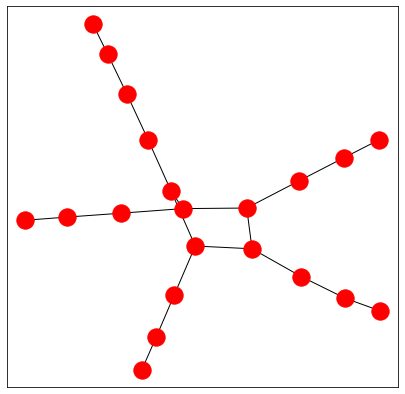

Frame 4


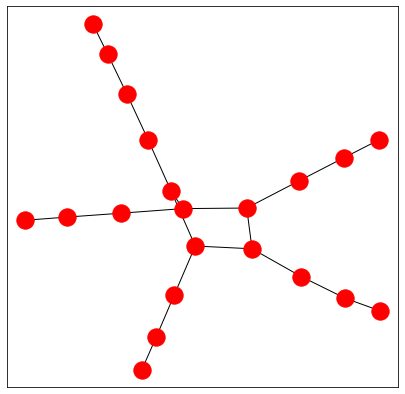

Frame 5


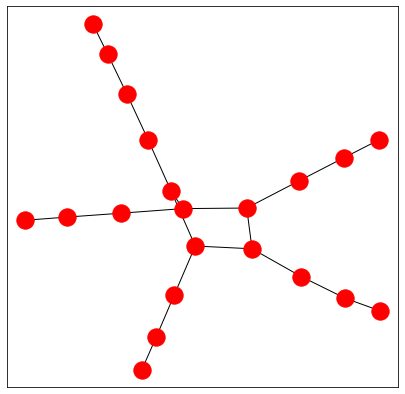

Frame 6


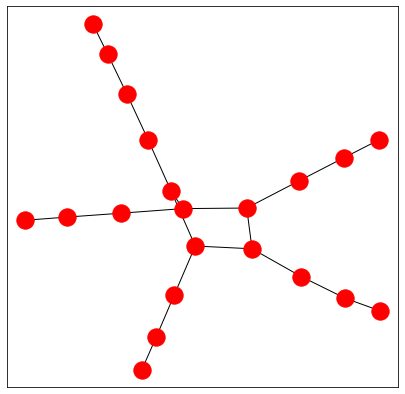

Frame 7


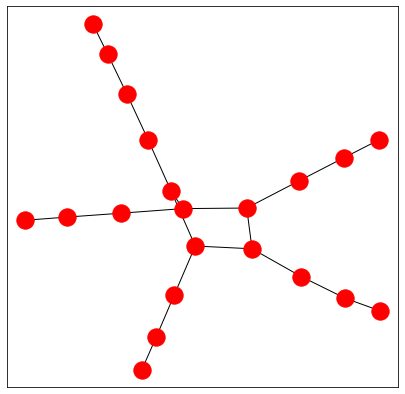

Frame 8


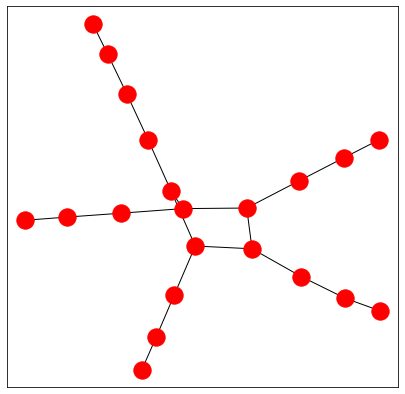

Frame 9


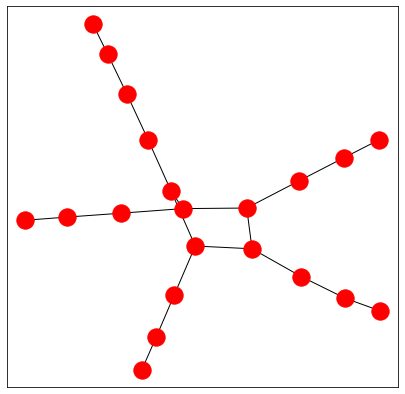

Frame 10


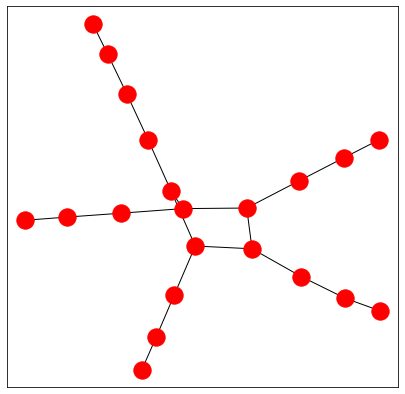

Frame 11


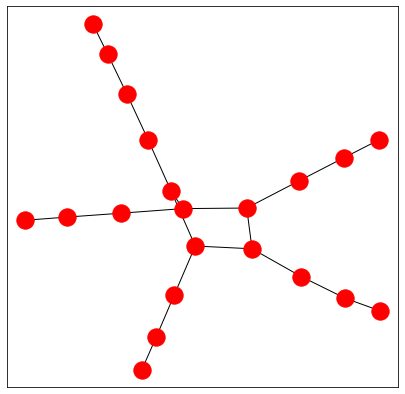

Frame 12


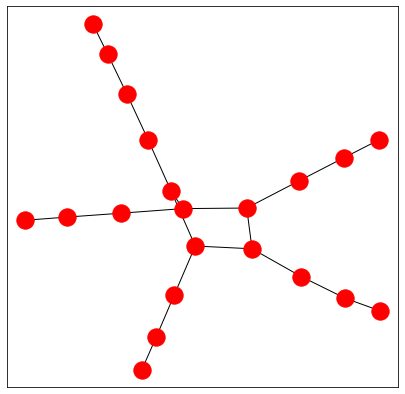

Frame 13


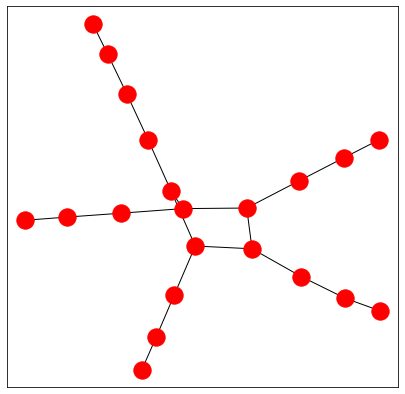

Frame 14


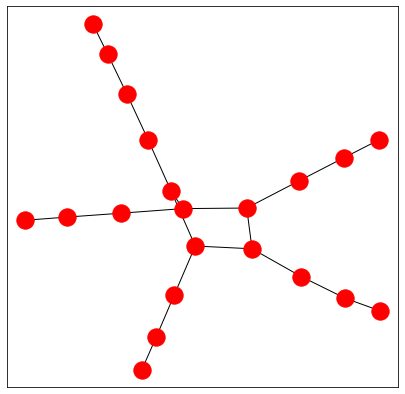

Frame 15


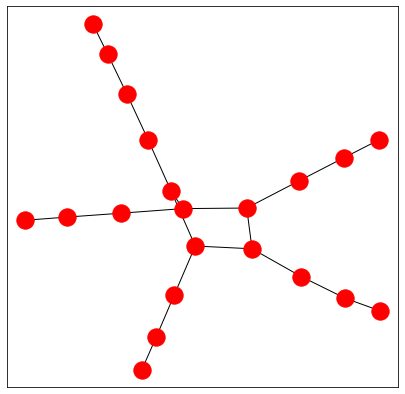

Frame 16


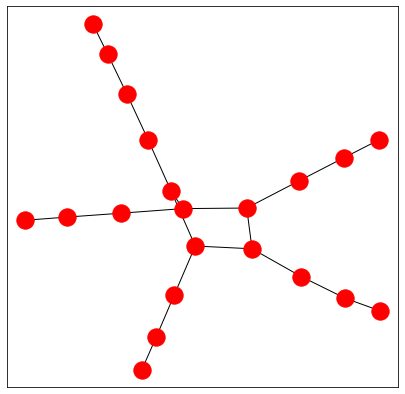

Frame 17


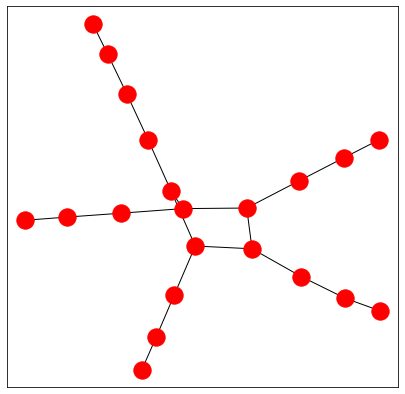

Frame 18


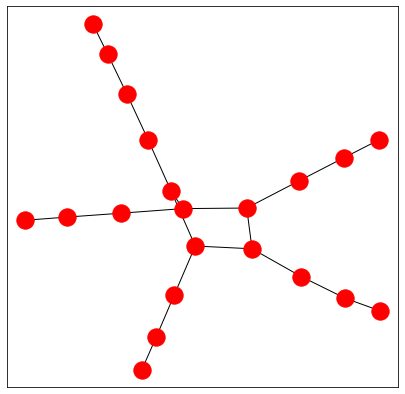

Frame 19


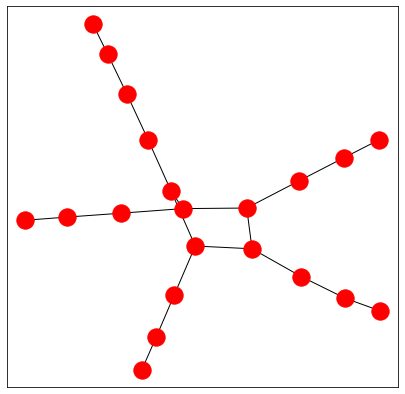

Frame 20


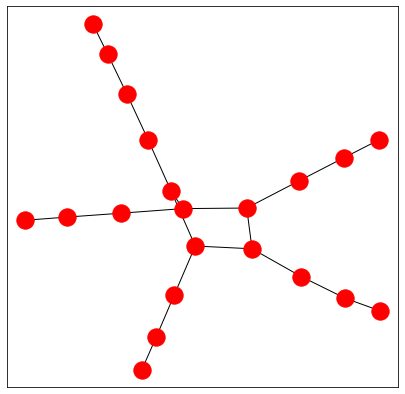

Frame 21


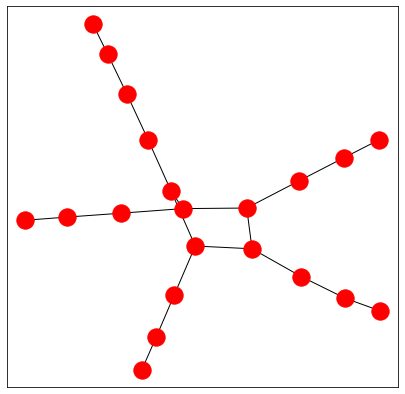

Frame 22


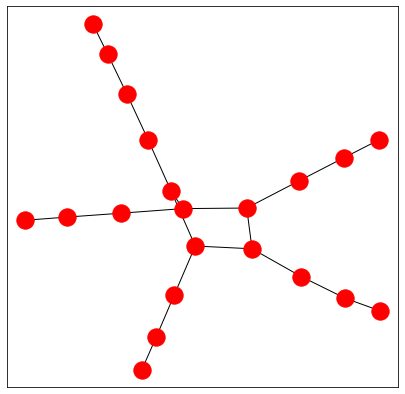

Frame 23


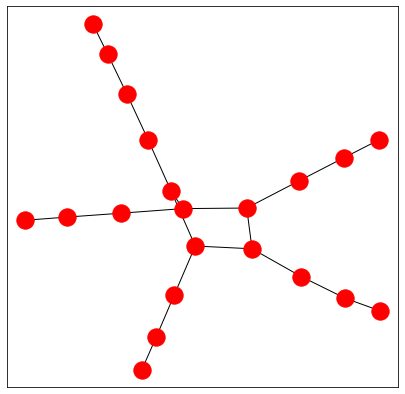

Frame 24


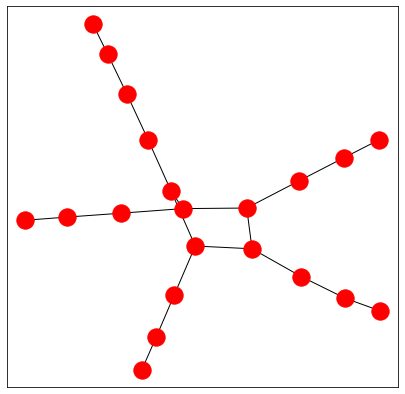

Frame 25


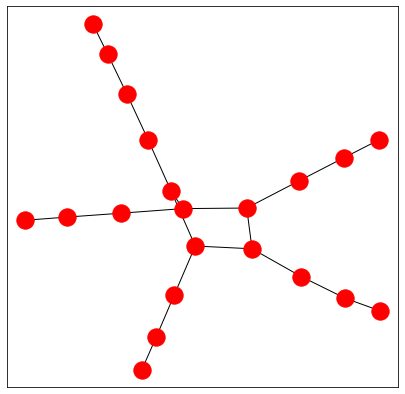

Frame 26


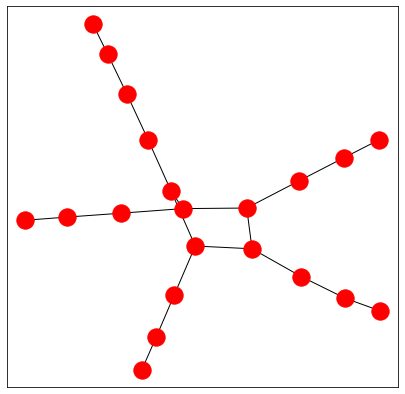

Frame 27


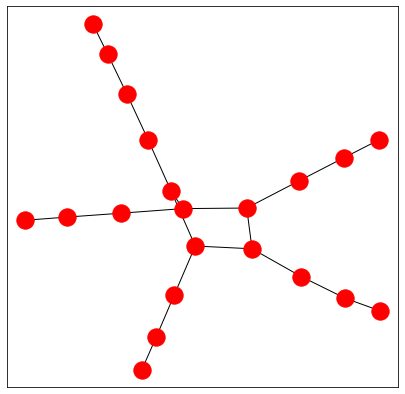

Frame 28


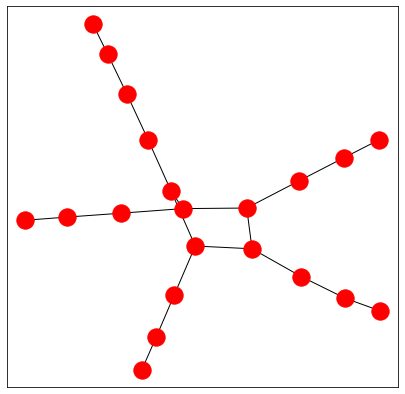

Frame 29


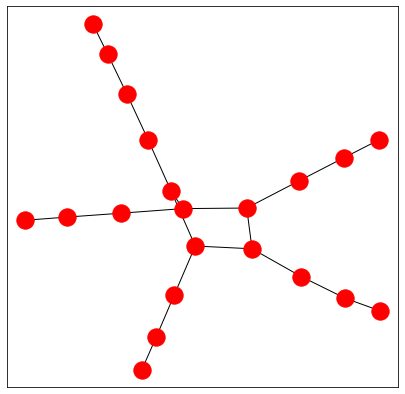

Frame 30


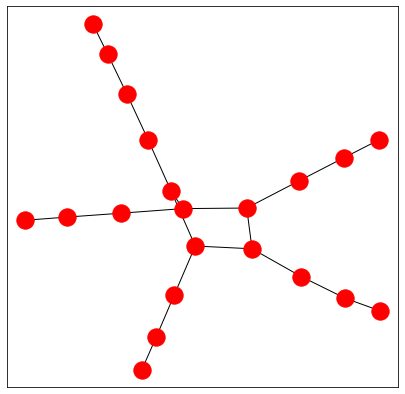

Frame 31


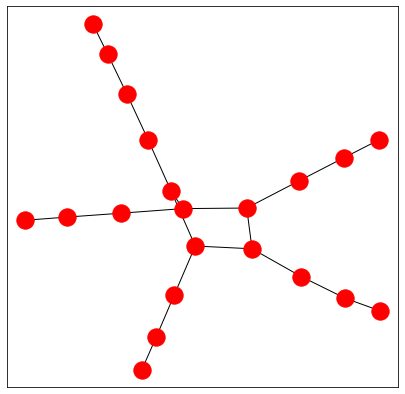

Frame 32


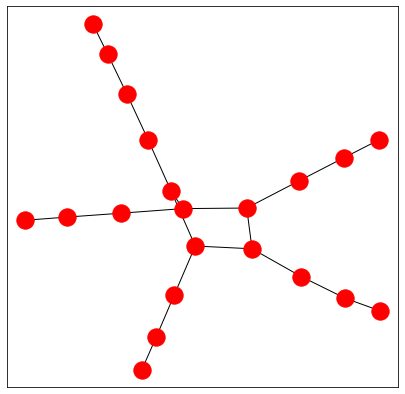

Frame 33


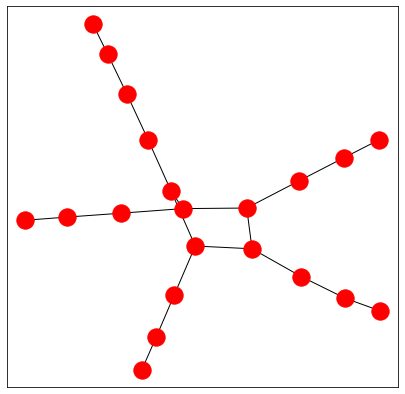

Frame 34


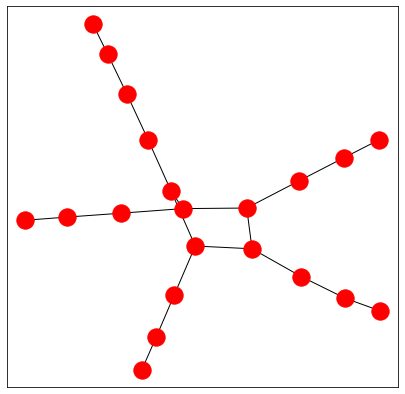

Frame 35


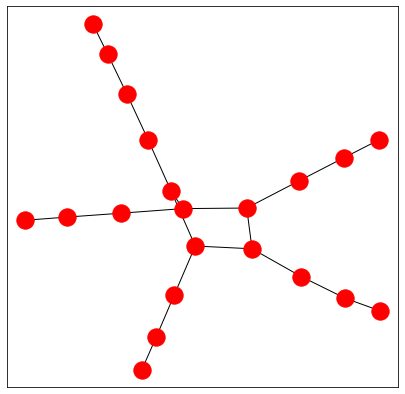

Frame 36


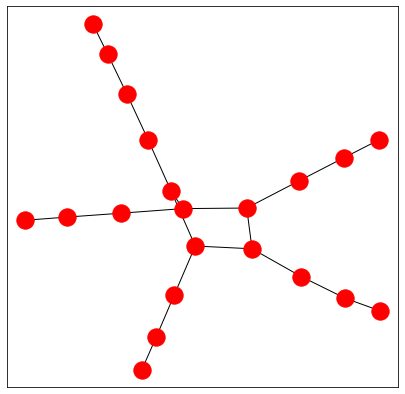

Frame 37


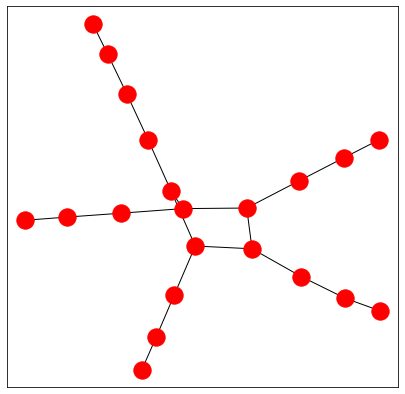

Frame 38


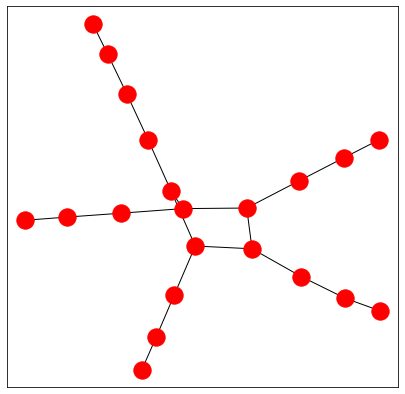

Frame 39


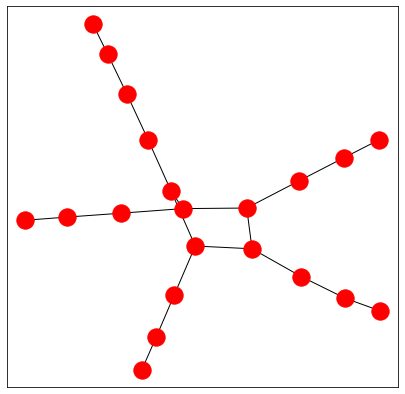

Frame 40


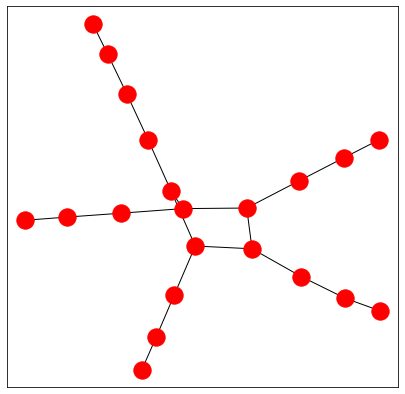

Frame 41


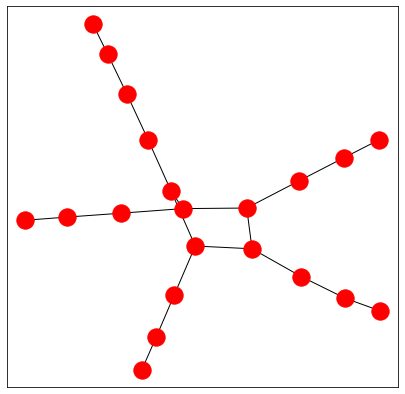

Frame 42


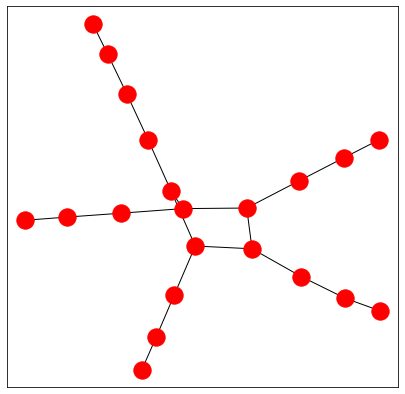

Frame 43


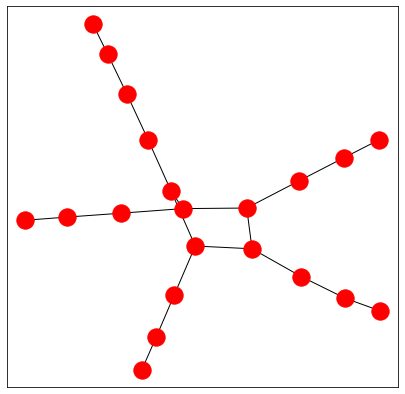

Frame 44


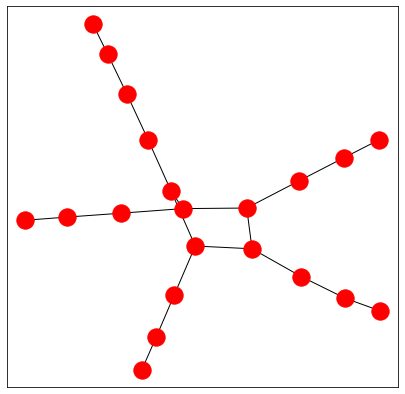

Frame 45


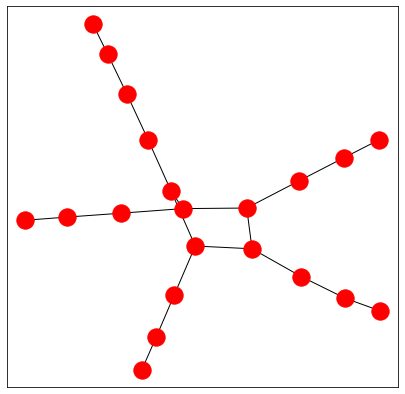

Frame 46


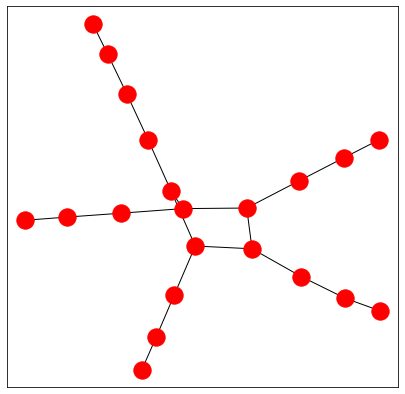

Frame 47


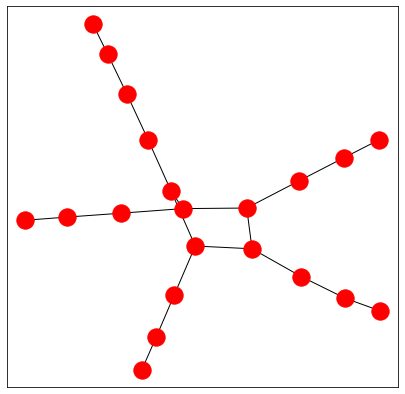

Frame 48


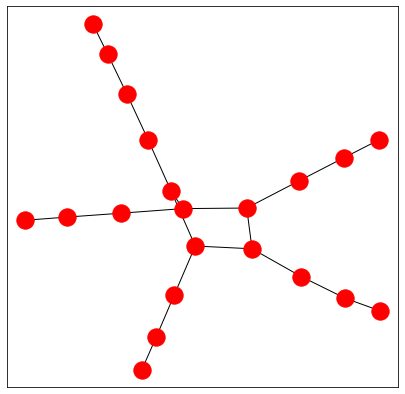

Frame 49


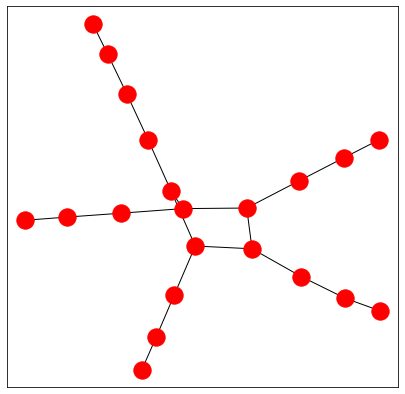

Frame 50


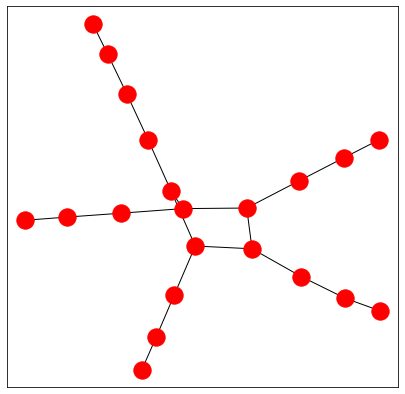

Frame 51


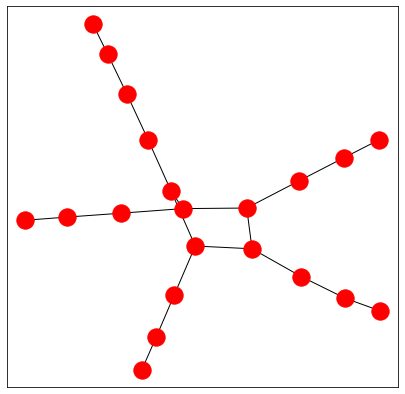

Frame 52


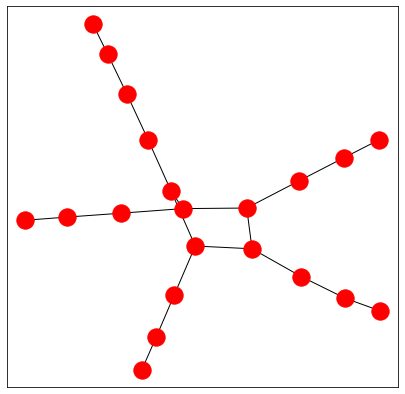

Frame 53


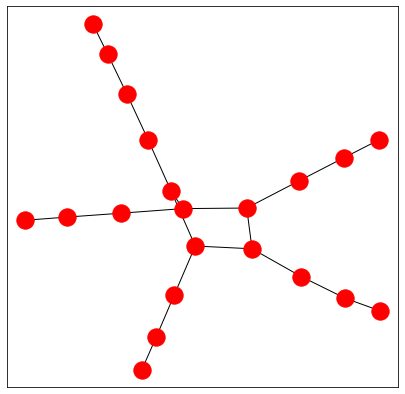

Frame 54


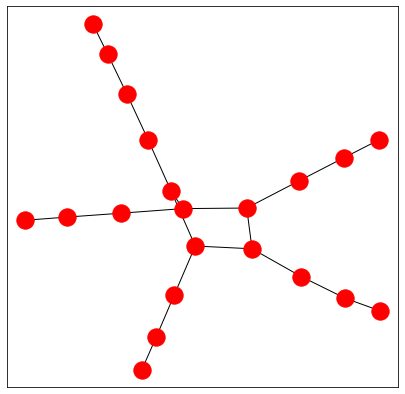

Frame 55


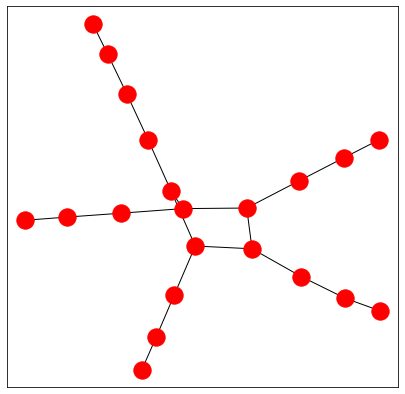

Frame 56


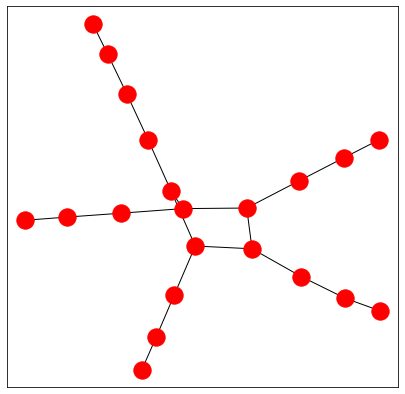

Frame 57


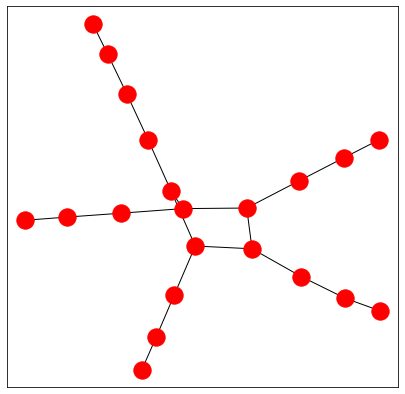

Frame 58


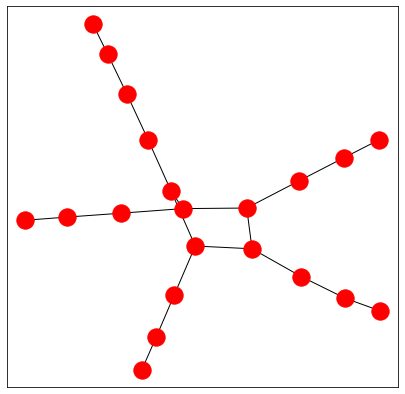

Frame 59


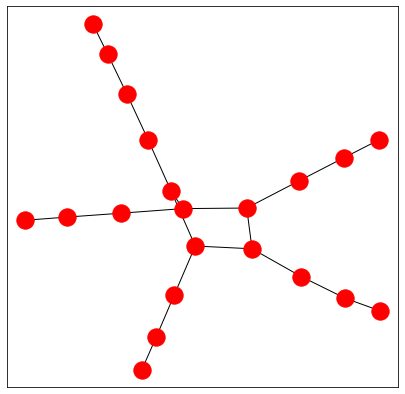

Frame 60


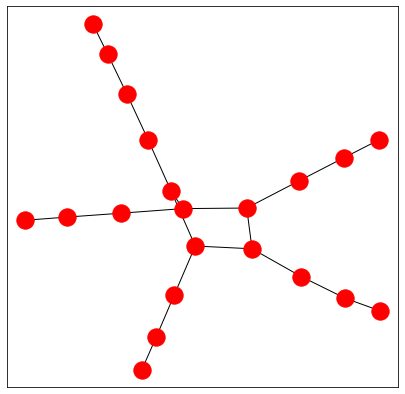

Frame 61


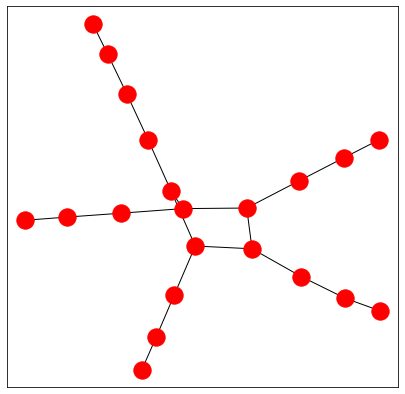

Frame 62


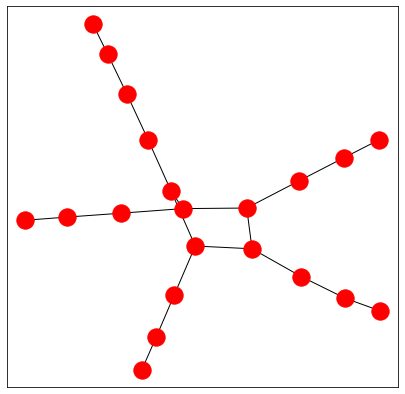

Frame 63


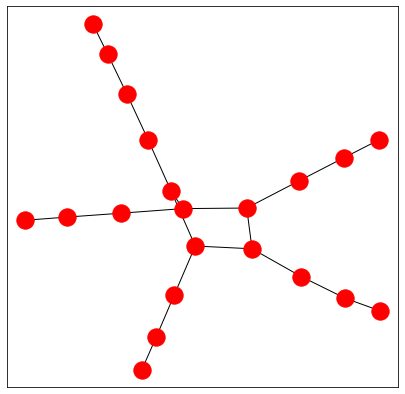

Frame 64


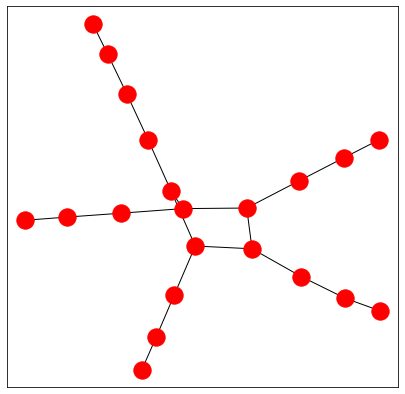

Frame 65


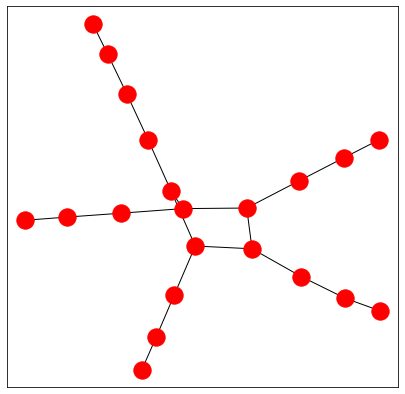

Frame 66


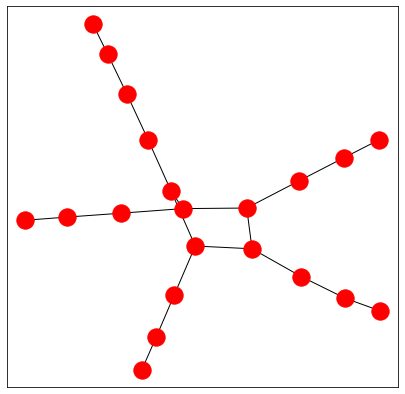

Frame 67


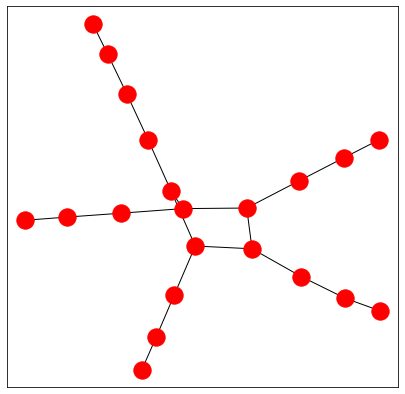

Frame 68


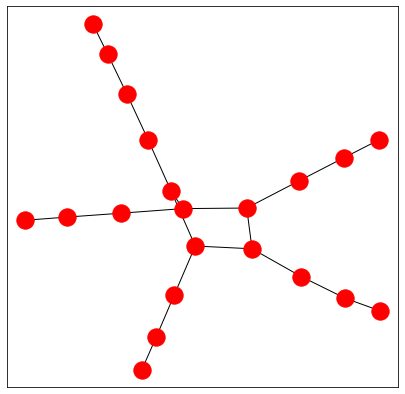

Frame 69


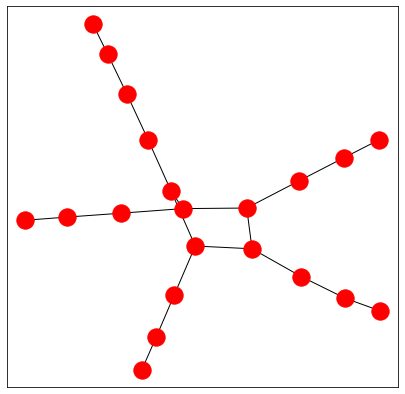

Frame 70


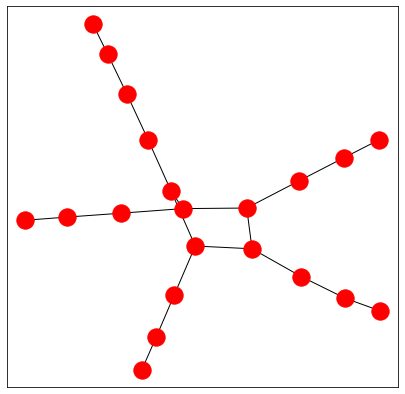

Frame 71


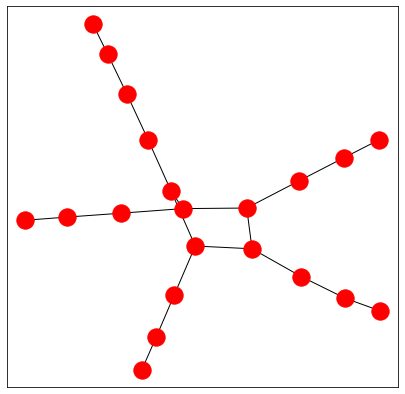

Frame 72


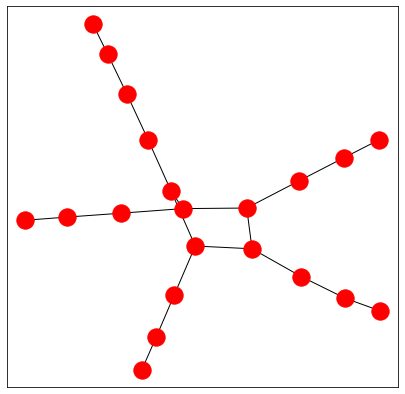

Frame 73


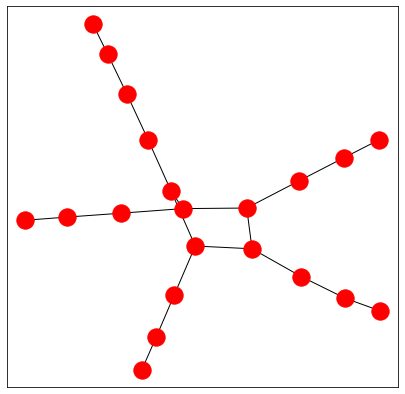

Frame 74


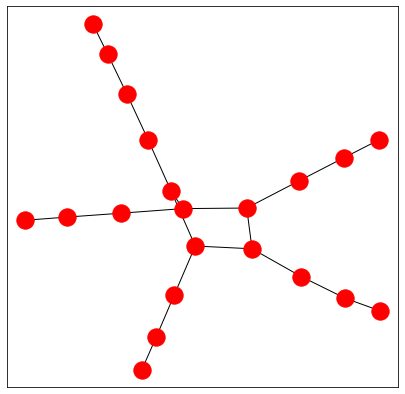

Frame 75


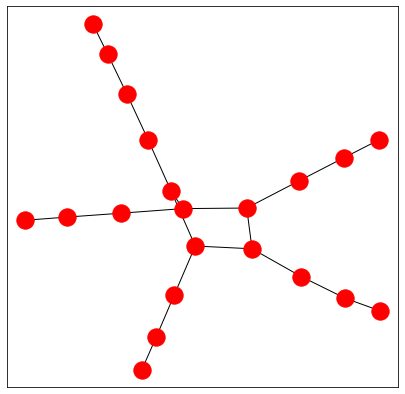

Frame 76


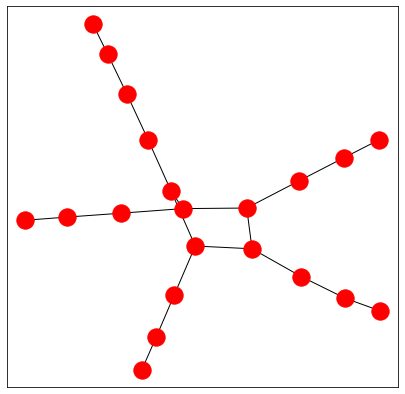

Frame 77


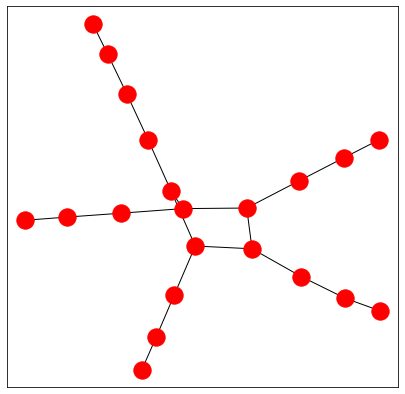

Frame 78


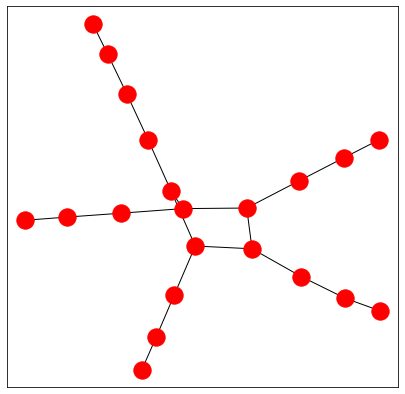

Frame 79


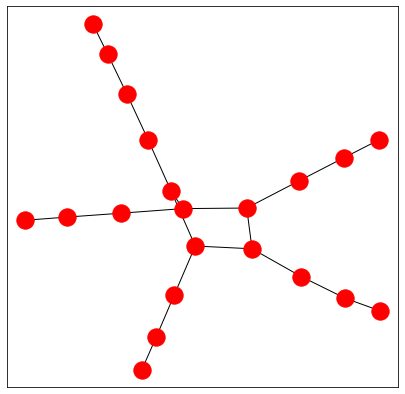

Frame 80


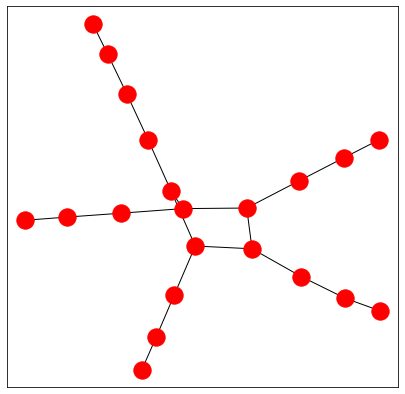

Frame 81


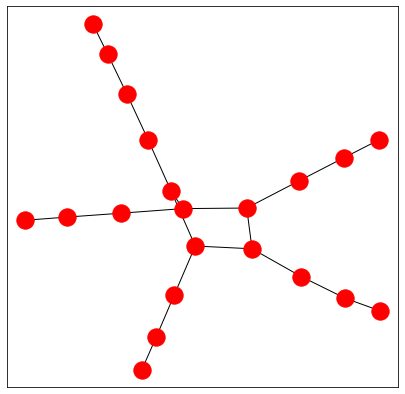

Frame 82


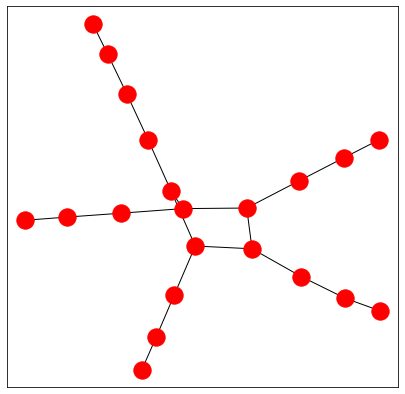

Frame 83


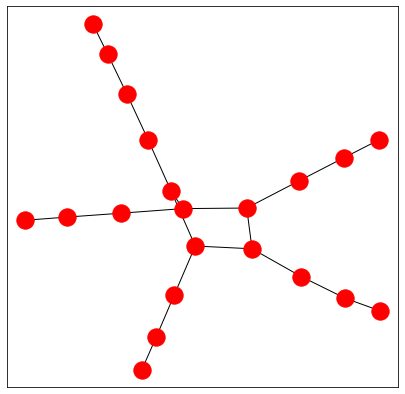

Frame 84


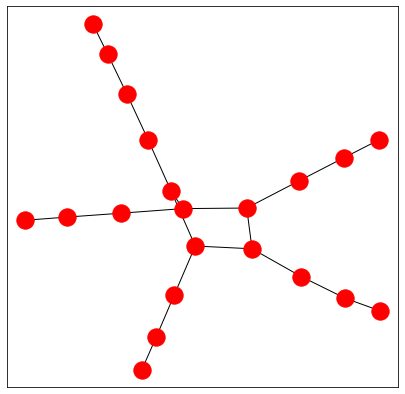

Frame 85


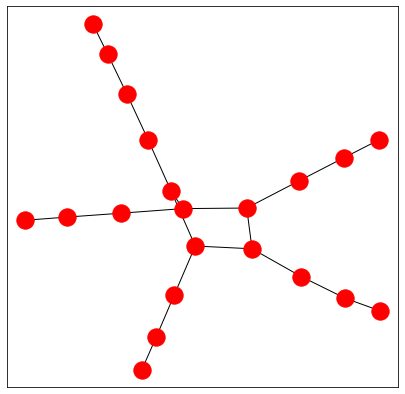

Frame 86


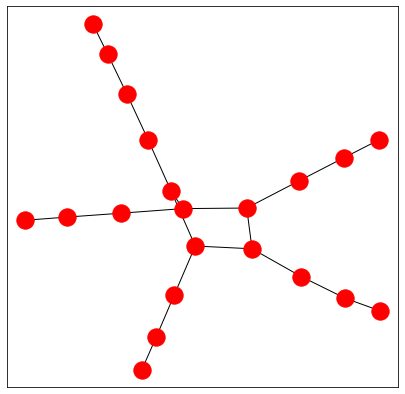

Frame 87


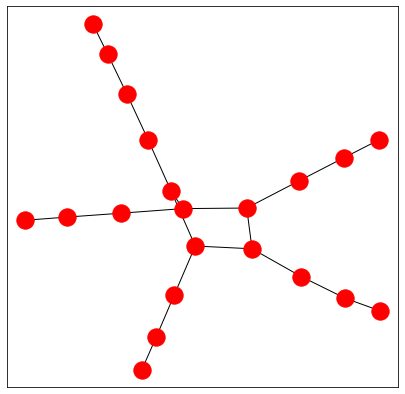

Frame 88


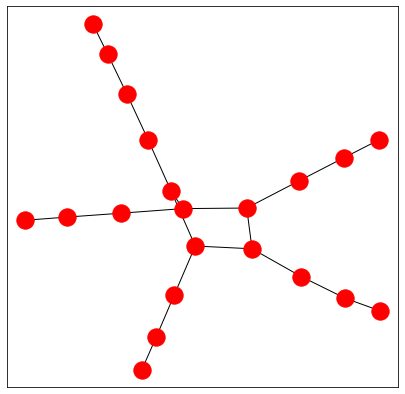

Frame 89


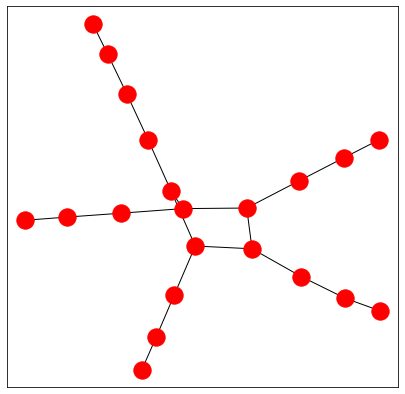

Frame 90


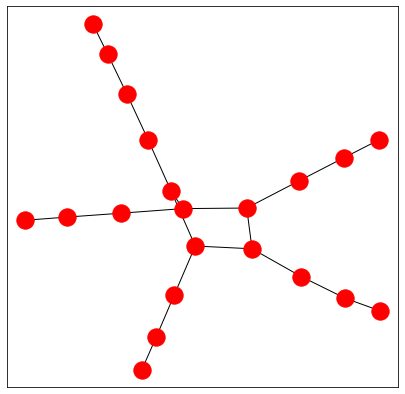

Frame 91


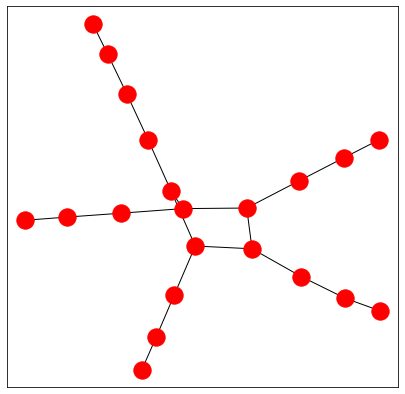

Frame 92


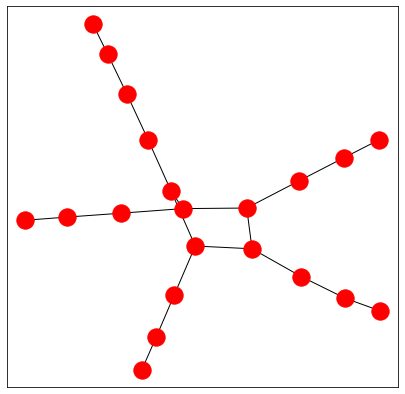

Frame 93


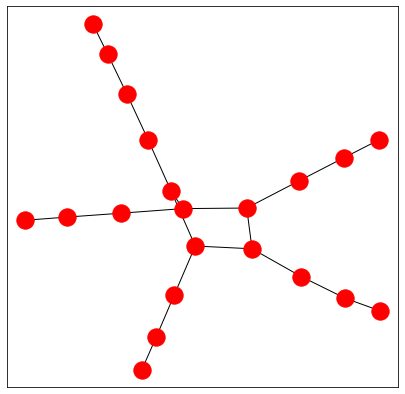

Frame 94


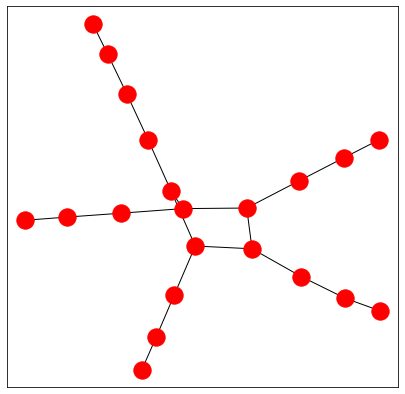

Frame 95


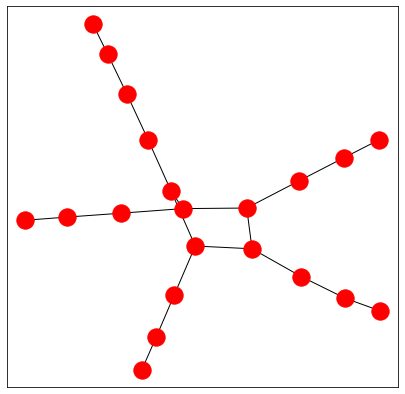

Frame 96


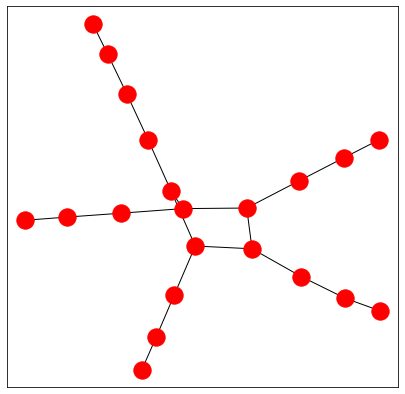

Frame 97


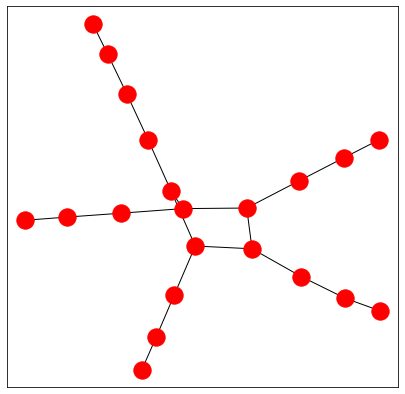

Frame 98


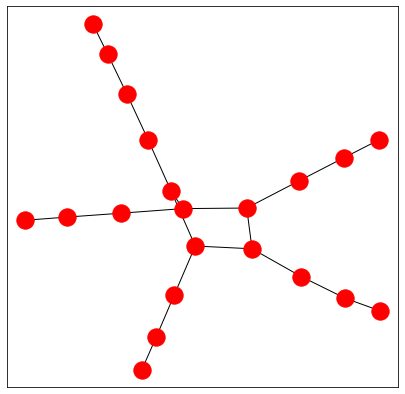

Frame 99


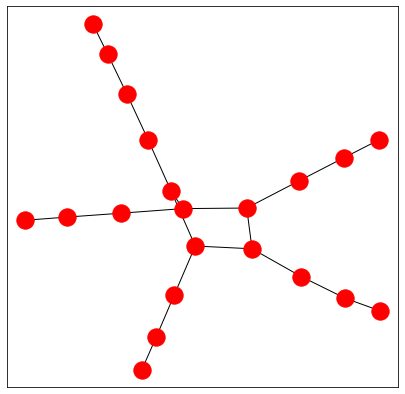

Frame 100


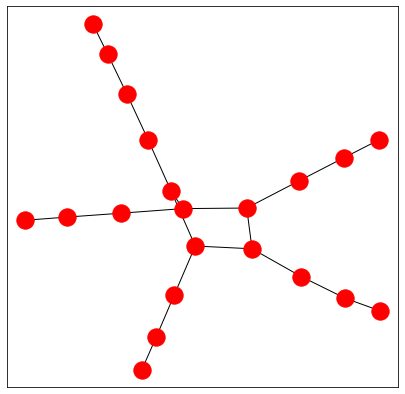

Frame 101


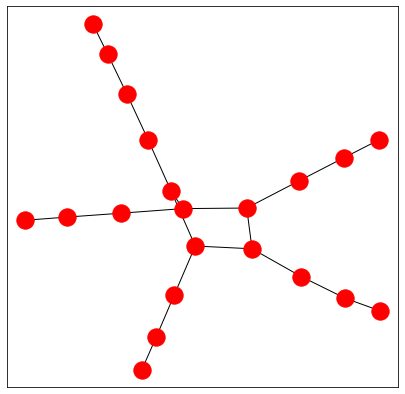

Frame 102


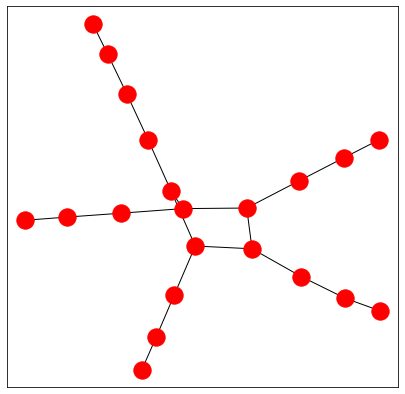

Frame 103


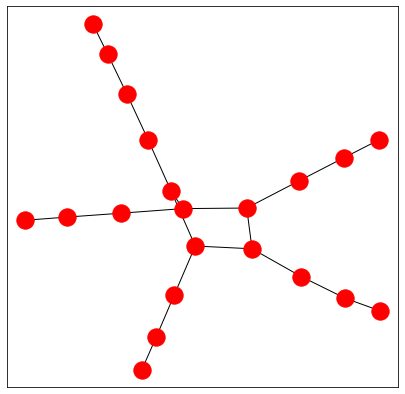

Frame 104


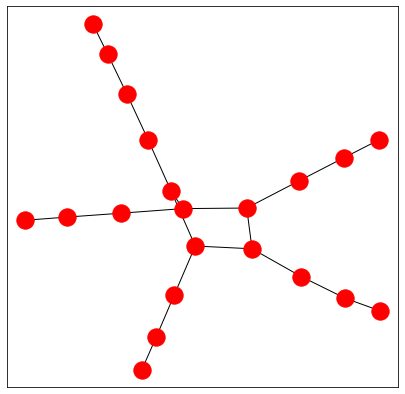

Frame 105


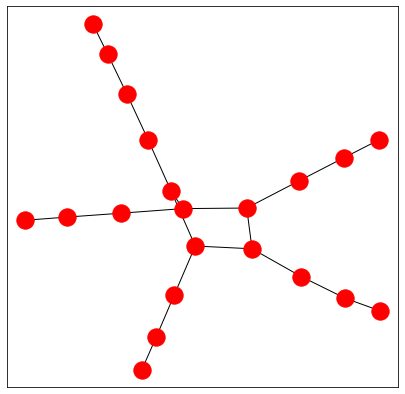

Frame 106


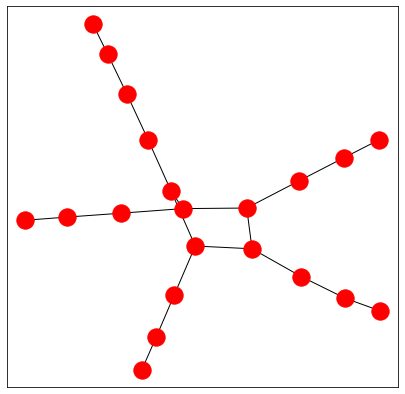

Frame 107


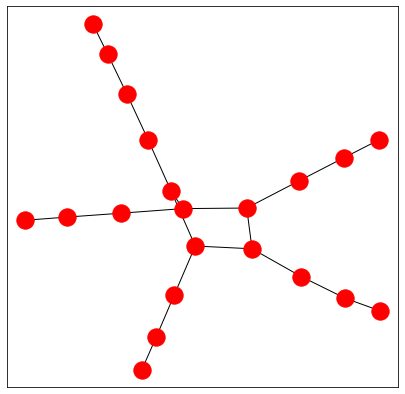

Frame 108


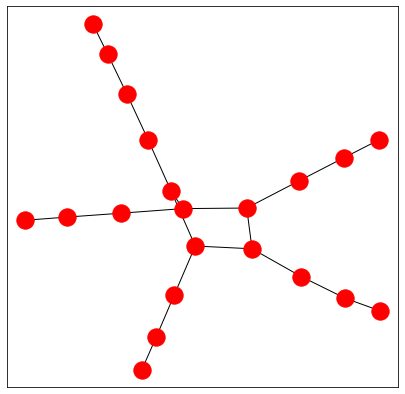

Frame 109


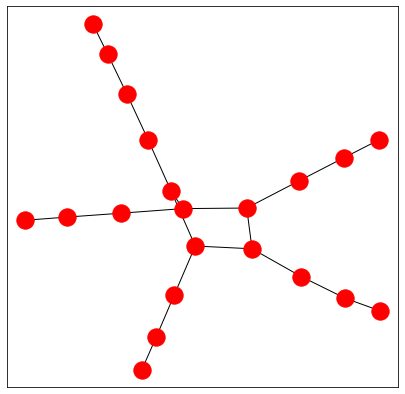

Frame 110


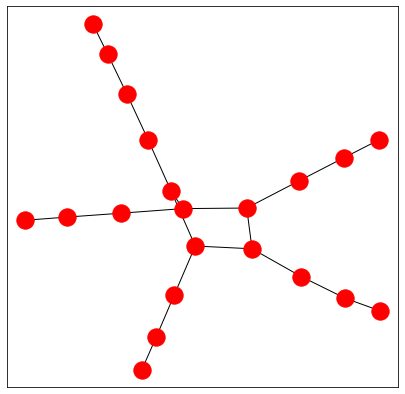

Frame 111


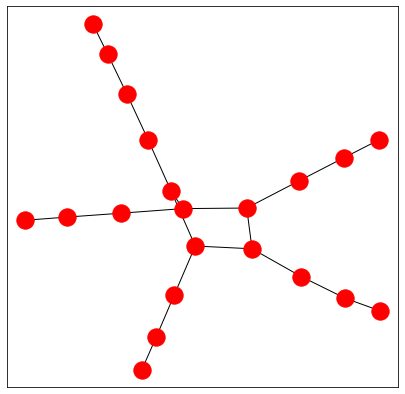

Frame 112


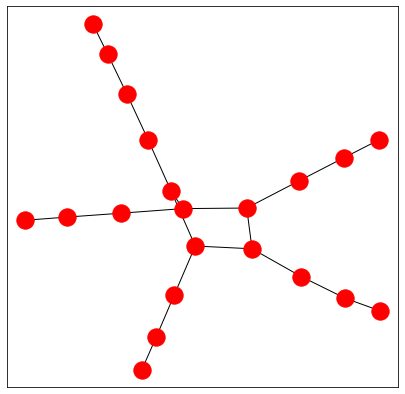

Frame 113


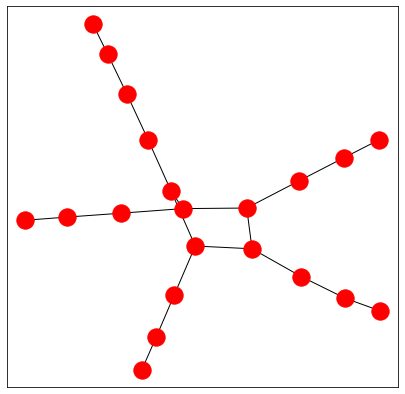

Frame 114


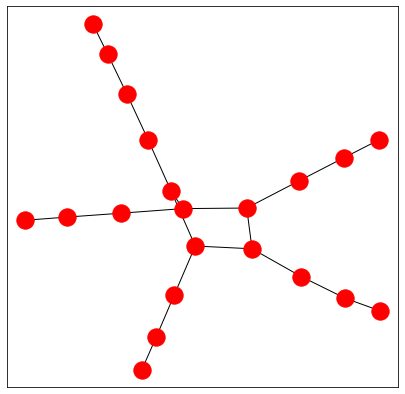

Frame 115


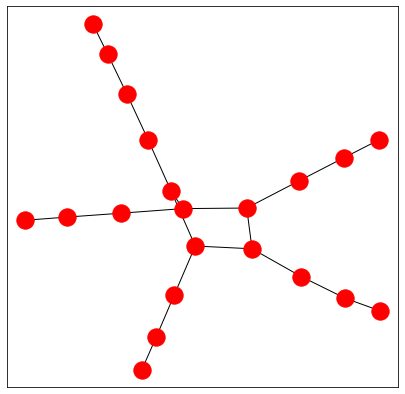

Frame 116


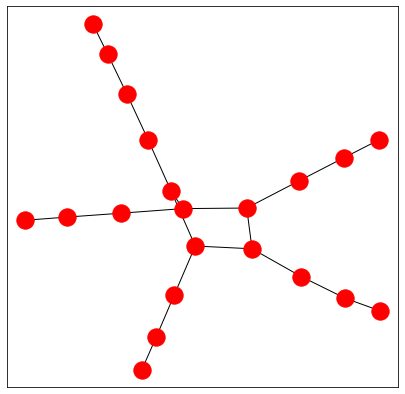

Frame 117


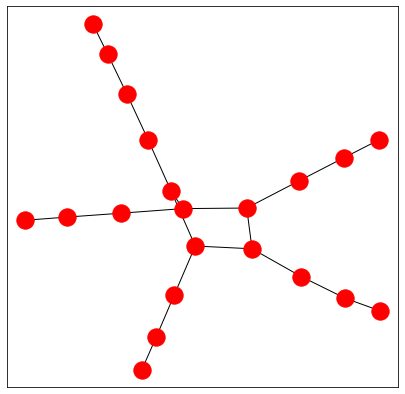

Frame 118


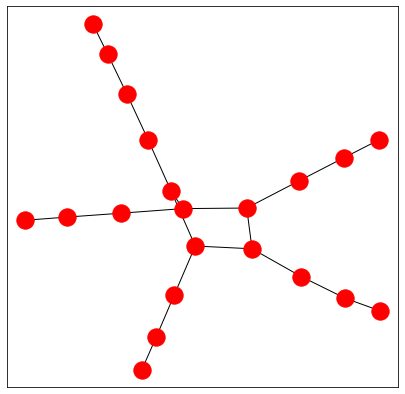

Frame 119


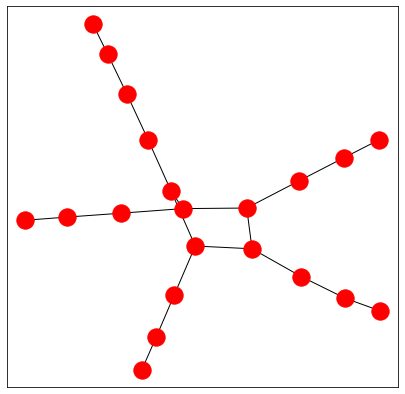

Frame 120


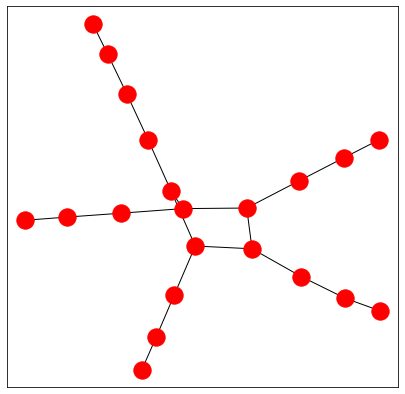

Frame 121


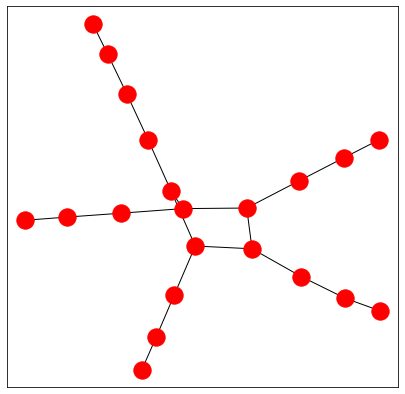

Frame 122


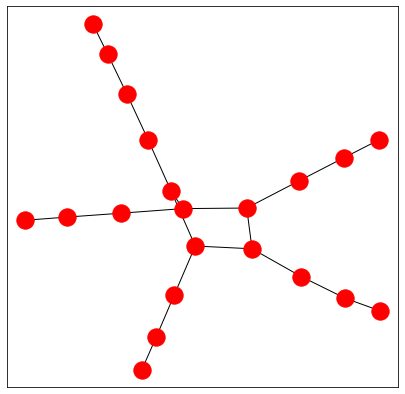

Frame 123


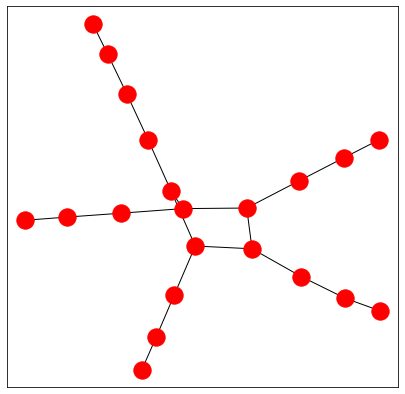

Frame 124


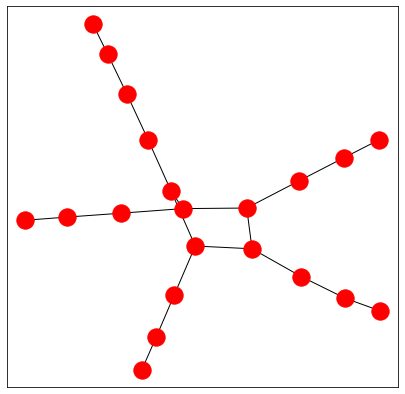

Frame 125


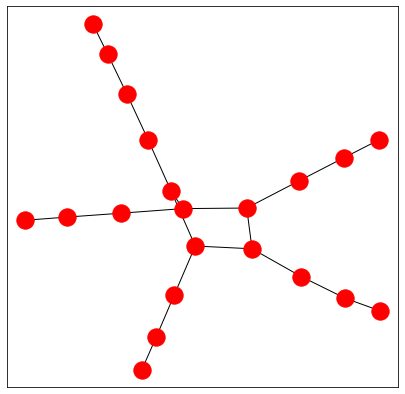

Frame 126


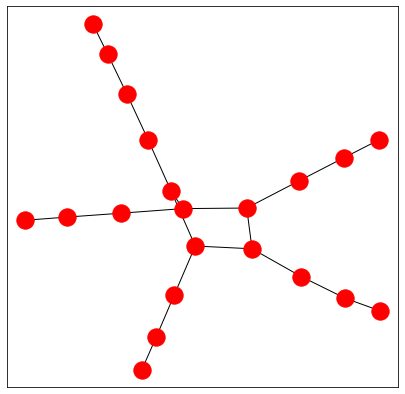

Frame 127


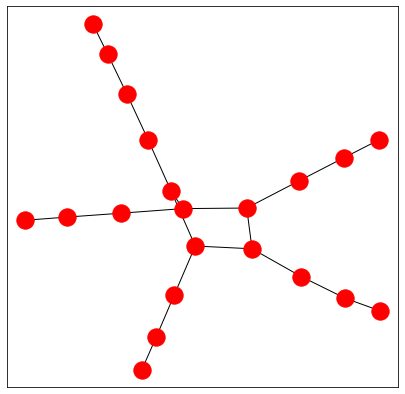

Frame 128


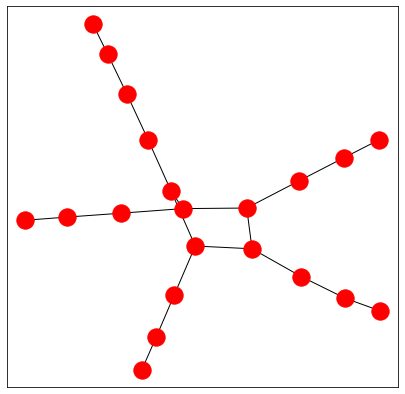

Frame 129


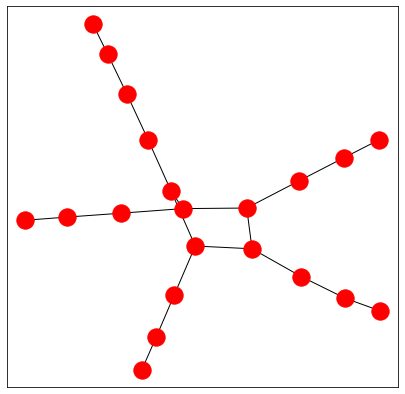

Frame 130


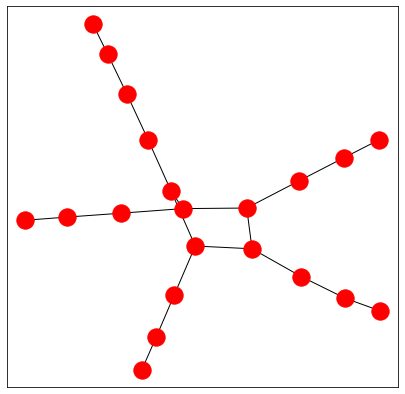

Frame 131


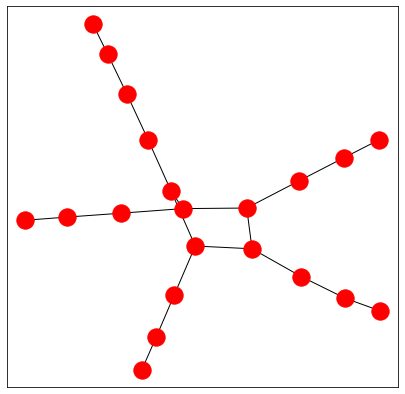

Frame 132


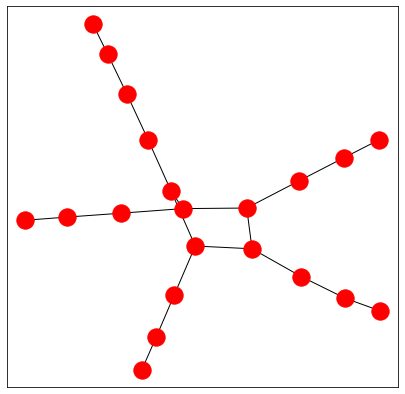

Frame 133


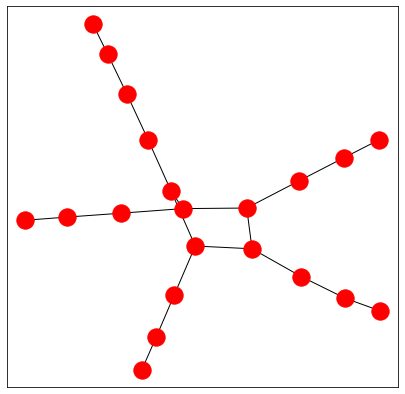

Frame 134


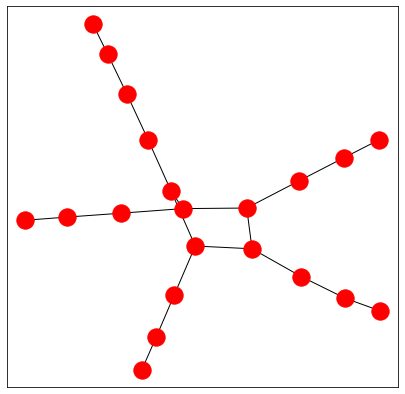

Frame 135


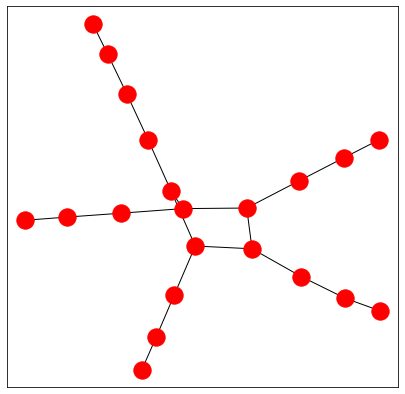

Frame 136


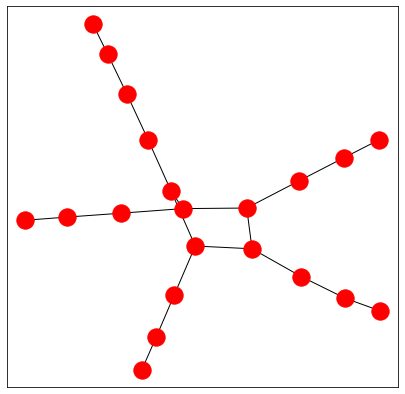

Frame 137


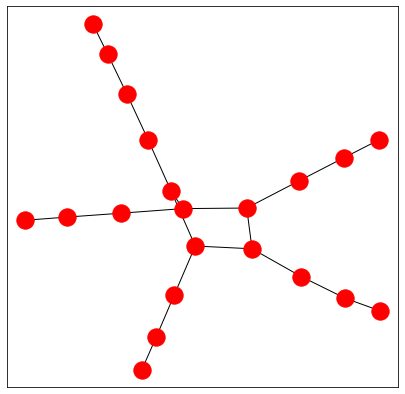

Frame 138


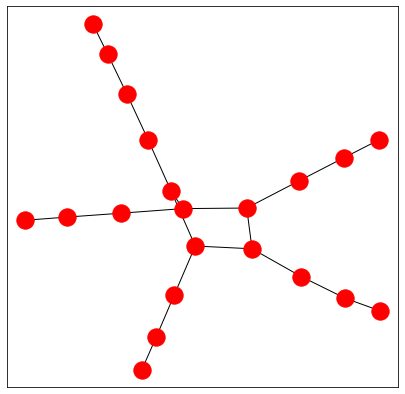

Frame 139


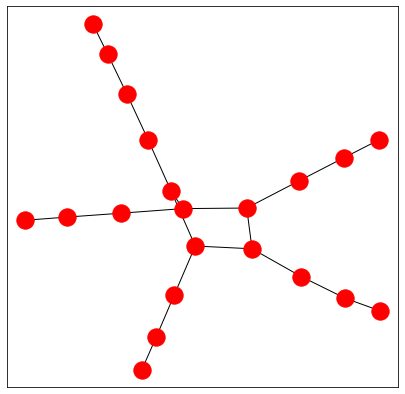

Frame 140


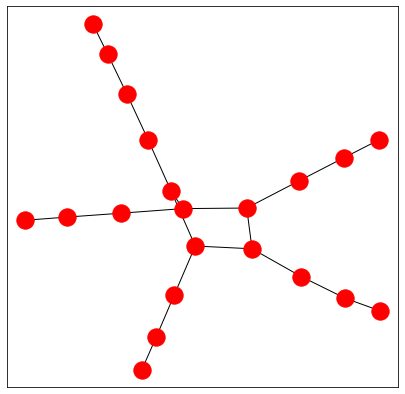

Frame 141


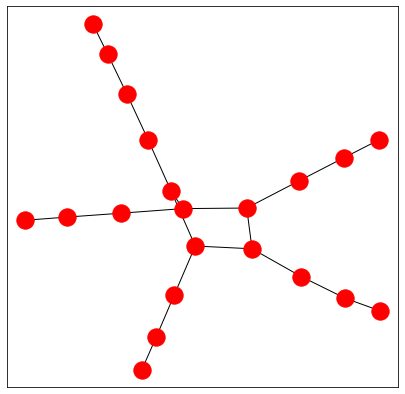

Frame 142


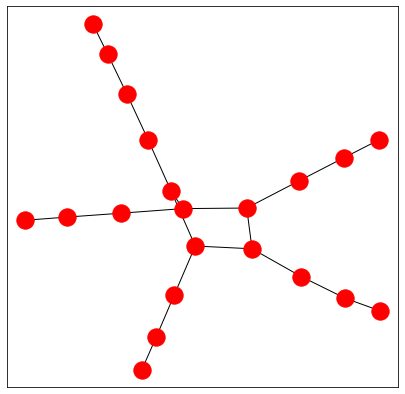

Frame 143


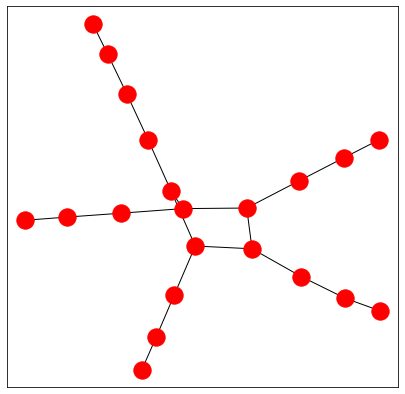

Frame 144


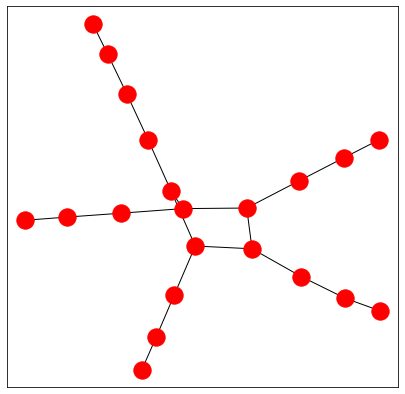

Frame 145


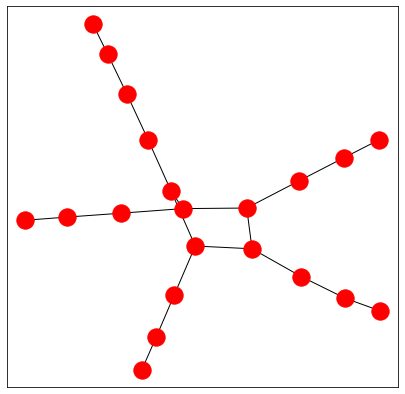

Frame 146


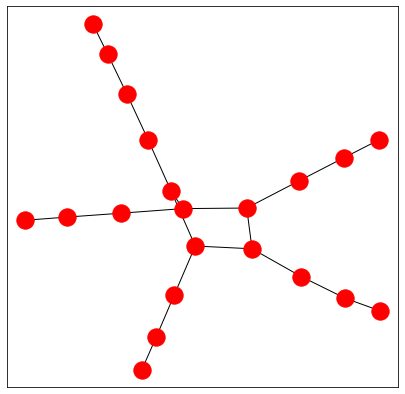

Frame 147


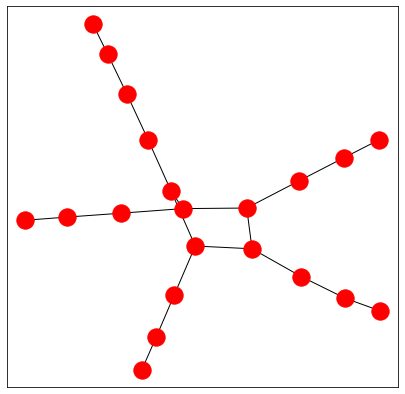

Frame 148


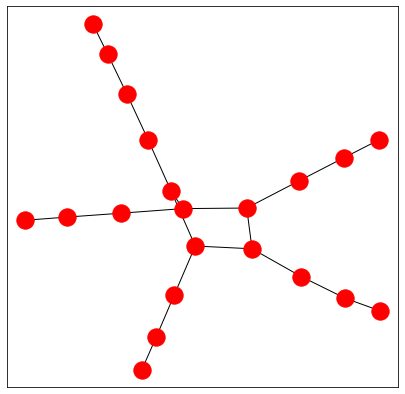

Frame 149


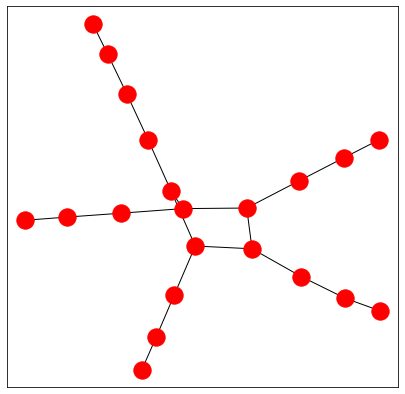

Frame 150


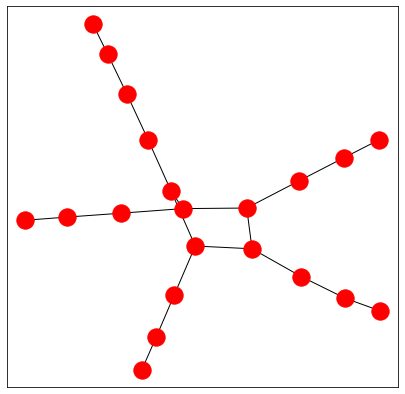

Frame 151


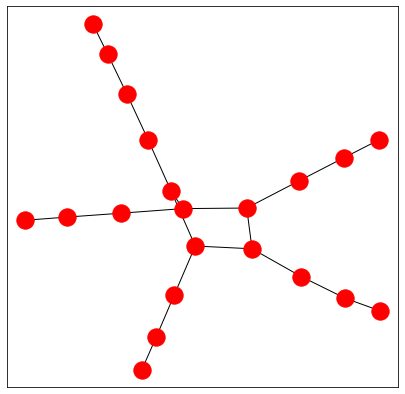

Frame 152


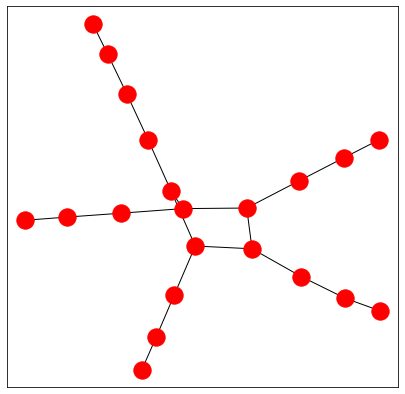

Frame 153


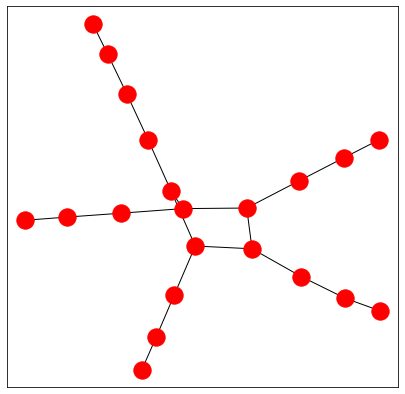

Frame 154


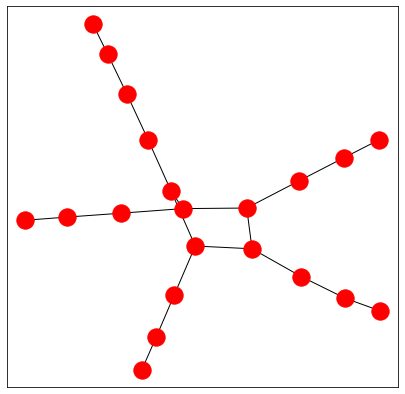

Frame 155


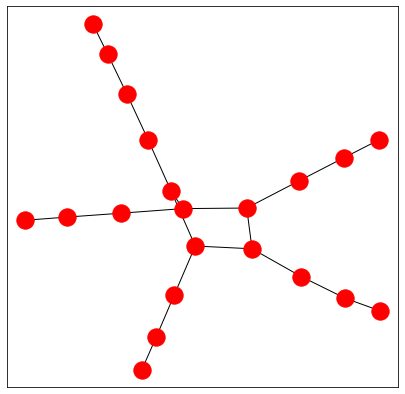

In [ ]:
for i in range(LeftHandTensor.shape[0]):
  data = Data(x=LeftHandTensor[i],edge_index=TransposedLeftHandEdge)
  G = to_networkx(data, to_undirected=True)
  print(f"Frame {i}")
  visualize(G)

In [ ]:
mp_holistic.POSE_CONNECTIONS

frozenset({(<PoseLandmark.NOSE: 0>, <PoseLandmark.LEFT_EYE_INNER: 1>),
           (<PoseLandmark.NOSE: 0>, <PoseLandmark.RIGHT_EYE_INNER: 4>),
           (<PoseLandmark.LEFT_EYE_INNER: 1>, <PoseLandmark.LEFT_EYE: 2>),
           (<PoseLandmark.LEFT_EYE: 2>, <PoseLandmark.LEFT_EYE_OUTER: 3>),
           (<PoseLandmark.LEFT_EYE_OUTER: 3>, <PoseLandmark.LEFT_EAR: 7>),
           (<PoseLandmark.RIGHT_EYE_INNER: 4>, <PoseLandmark.RIGHT_EYE: 5>),
           (<PoseLandmark.RIGHT_EYE: 5>, <PoseLandmark.RIGHT_EYE_OUTER: 6>),
           (<PoseLandmark.RIGHT_EYE_OUTER: 6>, <PoseLandmark.RIGHT_EAR: 8>),
           (<PoseLandmark.MOUTH_RIGHT: 10>, <PoseLandmark.MOUTH_LEFT: 9>),
           (<PoseLandmark.LEFT_SHOULDER: 11>, <PoseLandmark.LEFT_ELBOW: 13>),
           (<PoseLandmark.LEFT_SHOULDER: 11>, <PoseLandmark.LEFT_HIP: 23>),
           (<PoseLandmark.RIGHT_SHOULDER: 12>,
            <PoseLandmark.LEFT_SHOULDER: 11>),
           (<PoseLandmark.RIGHT_SHOULDER: 12>, <PoseLandmark.RIGHT_ELBOW: 14>)

In [ ]:
PoseEdgeIndex = [[x[0].value, x[1].value] for x in mp_holistic.POSE_CONNECTIONS]

In [ ]:
PoseEdgeIndex

[[17, 19],
 [12, 14],
 [30, 32],
 [5, 6],
 [4, 5],
 [13, 15],
 [26, 28],
 [24, 26],
 [23, 25],
 [11, 23],
 [25, 27],
 [2, 3],
 [12, 11],
 [28, 32],
 [3, 7],
 [15, 19],
 [16, 20],
 [27, 31],
 [15, 17],
 [1, 2],
 [0, 1],
 [27, 29],
 [6, 8],
 [14, 16],
 [28, 30],
 [15, 21],
 [29, 31],
 [12, 24],
 [16, 18],
 [16, 22],
 [24, 23],
 [0, 4],
 [18, 20],
 [10, 9],
 [11, 13]]

In [ ]:
PoseEdgeIndex = sorted(PoseEdgeIndex)

In [ ]:
PoseEdgeIndex

[[0, 1],
 [0, 4],
 [1, 2],
 [2, 3],
 [3, 7],
 [4, 5],
 [5, 6],
 [6, 8],
 [10, 9],
 [11, 13],
 [11, 23],
 [12, 11],
 [12, 14],
 [12, 24],
 [13, 15],
 [14, 16],
 [15, 17],
 [15, 19],
 [15, 21],
 [16, 18],
 [16, 20],
 [16, 22],
 [17, 19],
 [18, 20],
 [23, 25],
 [24, 23],
 [24, 26],
 [25, 27],
 [26, 28],
 [27, 29],
 [27, 31],
 [28, 30],
 [28, 32],
 [29, 31],
 [30, 32]]

In [ ]:
def ConvertEdgeIndex(target,is_face = False):
  if (is_face == False):
    EdgeIdx = [[x[0].value, x[1].value] for x in target]
  else:
    EdgeIdx = [list(x) for x in target]
  EdgeIdx = sorted(EdgeIdx)
  reverse_edge_index = [list(reversed(x)) for x in EdgeIdx]
  CreatedEdgeIndex = EdgeIdx + reverse_edge_index
  return sorted(CreatedEdgeIndex)

Pose와 Hands의 엣지 인덱스는 형태가 같지만, Face는 다름

In [ ]:
PoseEdgeIndex = ConvertEdgeIndex(mp_holistic.POSE_CONNECTIONS)

In [ ]:
HandsEdgeIndex = ConvertEdgeIndex(mp_holistic.HAND_CONNECTIONS)

In [ ]:
FaceEdgeIndex = ConvertEdgeIndex(mp_holistic.FACE_CONNECTIONS,is_face=True)
#Pose와 Hands와는 다른 형태

In [ ]:
#LeftHandEdgeTensor = torch.LongTensor(left_hand_edge_index)
PoseEdgeIndexTensor = torch.LongTensor(PoseEdgeIndex)
HandsEdgeIndexTensor = torch.LongTensor(HandsEdgeIndex)
FaceEdgeIndexTensor = torch.LongTensor(FaceEdgeIndex)

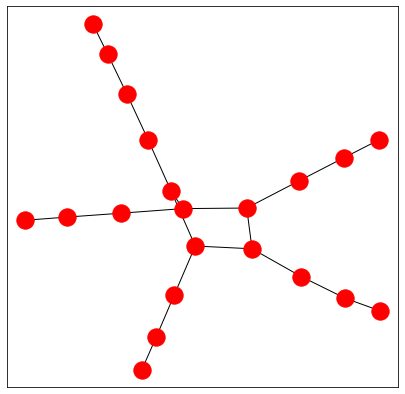

In [ ]:
RightHandData = Data(x=RightHandTensor[99],edge_index=torch.transpose(HandsEdgeIndexTensor,0,1))
RG = to_networkx(RightHandData, to_undirected=True)
visualize(RG)

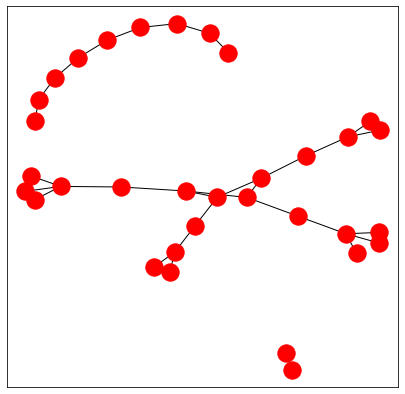

In [ ]:
PoseData = Data(x=poseTensor[99],edge_index=torch.transpose(PoseEdgeIndexTensor,0,1))
PG = to_networkx(PoseData,to_undirected=True)
def visualize(h, color="red", epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(h, pos=nx.spring_layout(h, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()
visualize(PG)

In [ ]:
FaceData = Data(x=FaceTensor[99],edge_index=torch.transpose(FaceEdgeIndexTensor,0,1))
FG = to_networkx(FaceData,to_undirected=True)

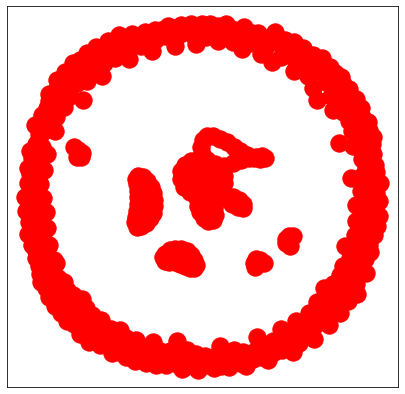

In [ ]:
visualize(FG)

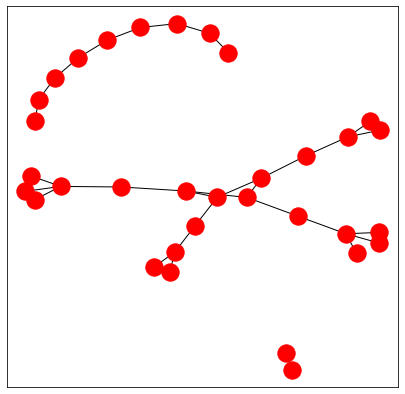

In [ ]:
PoseData2 = Data(x=poseTensor[1],edge_index=torch.transpose(PoseEdgeIndexTensor,0,1))
PG2 = to_networkx(PoseData2,to_undirected=True)
visualize(PG2)

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv

num_features = 3
num_classes = 1

class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2,num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(3, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=1, bias=True)
)


Embedding shape: [33, 2]


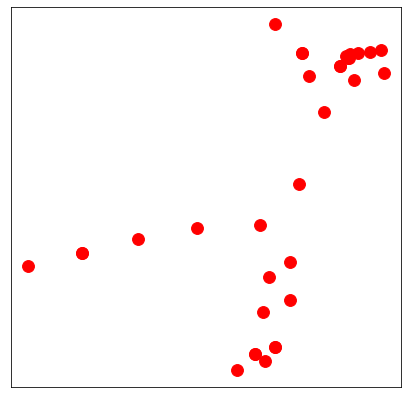

In [ ]:
model = GCN()

_, h = model(PoseData.x, PoseData.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color="red")